##Librerías a Utilizar

In [263]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import random
import numpy as np
import pprint
import copy
import seaborn as sns
import logging
import ast
import time
import psutil
from collections import Counter
from google.colab import drive

## Accediendo a la carpeta en Drive

In [264]:

drive.mount('/content/drive')

my_drive_content = os.listdir('/content/drive/MyDrive/')
#display(my_drive_content)
my_drive = "/content/drive/MyDrive/"
compra_genetica = os.path.join(my_drive, "Proyecto - Compra Genética")
display(compra_genetica)
os.listdir(compra_genetica)
problem_set_file = os.path.join(compra_genetica, "problemset")
os.listdir(problem_set_file)

problem_set_path = os.path.join(problem_set_file, "problemset.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Proyecto - Compra Genética'

## Leyendo el problemset

In [265]:
problem_set = pd.read_excel(problem_set_path)
problem_set.head()

,problem_cluster,catalog,fuel_price,query,qbf best solution,qbf best value,ga best solution,ga best value,gc best solution,gc best value,gn best solution,gn best value
0,small-3s-4p-f1_10-q1_4-random,problemset/in/small-3s-4p-f1_10-q1_4-random_ca...,1,['Purificadores de aire'],"[array(['Supermercado Nacional', 'Purificadore...",4401.99,"[array(['Supermercado Nacional', 'Purificadore...",4401.99,"[array(['Supermercado Nacional', 'Purificadore...",4401.99,"[array(['Supermercado Nacional', 'Purificadore...",4401.99
1,small-3s-4p-f1_10-q1_4-random,problemset/in/small-3s-4p-f1_10-q1_4-random_ca...,1,"['Purificadores de aire', 'Aceite de girasol',...","[array(['Jumbo', 'Aceite de girasol'], dtype=o...",11270.96,"[array(['Supermercado Nacional', 'Purificadore...",11283.96,"[array(['Jumbo', 'Aceite de girasol'], dtype=o...",11270.96,"[array(['Supermercado Nacional', 'Alfombras'],...",12817.96
2,small-3s-4p-f1_10-q1_4-random,problemset/in/small-3s-4p-f1_10-q1_4-random_ca...,6,['Purificadores de aire'],"[array(['Supermercado Nacional', 'Purificadore...",4501.99,"[array(['Supermercado Nacional', 'Purificadore...",4501.99,"[array(['Supermercado Nacional', 'Purificadore...",4501.99,"[array(['Supermercado Nacional', 'Purificadore...",4501.99
3,small-3s-4p-f1_10-q1_4-random,problemset/in/small-3s-4p-f1_10-q1_4-random_ca...,6,"['Purificadores de aire', 'Pasta de dientes', ...","[array(['Jumbo', 'Pasta de dientes'], dtype=ob...",11400.96,"[array(['Supermercado Nacional', 'Purificadore...",11478.96,"[array(['Jumbo', 'Pasta de dientes'], dtype=ob...",11400.96,"[array(['Supermercado Nacional', 'Alfombras'],...",12917.96
4,small-5s-10p-f0_10-q1_10-random,problemset/in/small-5s-10p-f0_10-q1_10-random_...,0,['Televisores'],"[array(['Super Pola', 'Televisores'], dtype=ob...",619.99,"[array(['Super Pola', 'Televisores'], dtype=ob...",619.99,"[array(['Super Pola', 'Televisores'], dtype=ob...",619.99,"[array(['Bravo', 'Televisores'], dtype=object)]",3638.99


## Leyendo un Catalogo, Grafo y precio de combustible al Azar

In [266]:
def read_catalogo_grafo_fuel(indice:int):
  os.chdir(compra_genetica)
  print(os.getcwd())
  catalogo_grafo = problem_set.loc[indice, 'catalog']
  catalogo = pd.read_excel(catalogo_grafo, 'catalogo')
  grafo = pd.read_excel(catalogo_grafo, 'grafo')
  fuel_price = problem_set.loc[indice, 'fuel_price']
  return catalogo, grafo, fuel_price

catalogo, grafo, fuel_price = read_catalogo_grafo_fuel(0)
display(catalogo.head(), grafo.head())

/content/drive/MyDrive/Proyecto - Compra Genética


,store,product,price
0,Jumbo,Alfombras,1998.99
1,Supermercado Nacional,Purificadores de aire,4381.99
2,Supermercado Nacional,Alfombras,1274.99
3,Supermercado Nacional,Pasta de dientes,3023.99
4,Supermercado Nacional,Aceite de girasol,4116.99


,edge 1,edge 2,distance
0,Jumbo,Jumbo,4
1,Jumbo,Supermercado Nacional,4
2,La Sirena,Supermercado Nacional,16
3,Jumbo,La Sirena,18
4,Supermercado Nacional,Jumbo,15


In [267]:
catalogo.loc[(catalogo["product"]  == "Purificadores de aire")]

,store,product,price
1,Supermercado Nacional,Purificadores de aire,4381.99
5,Jumbo,Purificadores de aire,4724.99
11,La Sirena,Purificadores de aire,4783.99


In [268]:
4401.99 - 4381.99

20.0

In [269]:
dd = grafo.pivot_table(index='edge 1', columns='edge 2', values='distance')
dd.columns.name = None
dd.index.name = None


## Verificando si hay que grafos que no son completamente conexos

In [270]:
catalogo.isnull().sum()

,0
store,0
product,0
price,0


In [271]:
catalogo.shape

(12, 3)

In [272]:
grafo.isnull().sum()

,0
edge 1,0
edge 2,0
distance,0


In [273]:
grafo.shape

(16, 3)

<Axes: >

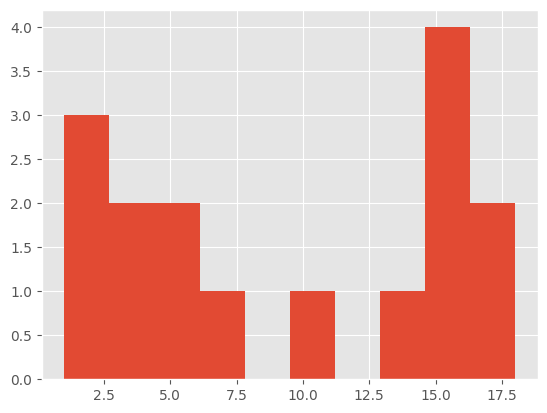

In [274]:
grafo.distance.hist()

In [275]:
distance_prueba  =grafo.pivot_table(index='edge 1', columns='edge 2', values='distance')
distance_prueba.columns.name = None
distance_prueba.index.name = None
distance_prueba

,Casa,Jumbo,La Sirena,Supermercado Nacional
Casa,1.0,7.0,11.0,5.0
Jumbo,18.0,4.0,18.0,4.0
La Sirena,6.0,1.0,14.0,16.0
Supermercado Nacional,15.0,15.0,16.0,1.0


## Clase GA optimization

Con log_path

In [167]:
class GAOptimization:
  def  __init__(self, project_path:str, indice:int, pop_size:int, penalty_factor:float, selection_params:dict, crossover_params:dict, mutation_params:dict, epoch:int, log_path:str) -> None:
    default_crossover = {
            "method": "uniform",
            "crossover_rate": 0.7,
            "inheritance_rate": 0.7,
            "uniform_rate": 0.5
    }

    default_mutation = {
            "method": "swap",
            "mutation_rate": 0.05
    }

    default_selection = {
            "method": "hard",
            "selection_rate": 0.66
    }

    # Primarias
    self.project_path = project_path
    self.indice = indice
    self.pop_size = pop_size
    self.penalty_factor = penalty_factor

    self.selection_params = {**default_selection, **(selection_params or {})}
    self.crossover_params = {**default_crossover, **(crossover_params or {})}
    self.mutation_params = {**default_mutation, **(mutation_params or {})}
    self.epoch = epoch

    # Configuración del logger utilizando el log_path pasado como parámetro
    self.logger = logging.getLogger(f"{self.__class__.__name__}_{indice}")
    if self.logger.hasHandlers():
        self.logger.handlers.clear()

    # Asegurarse de que log_path sea absoluto
    abs_log_path = os.path.abspath(log_path)
    final_log_path = os.path.join(abs_log_path, f"{indice}.txt")
    # Imprime la ruta final para depuración
    print("Final log path:", final_log_path)

    handler = logging.FileHandler(final_log_path)
    handler.setFormatter(logging.Formatter("%(asctime)s — %(message)s", "%H:%M:%S"))
    self.logger.addHandler(handler)
    self.logger.setLevel(logging.INFO)
    self.logger.propagate = False



    ## Data
    self.catalogo, self.grafo, self.fuel_price = self.read_catalogo_grafo_fuel()
    self.distance_matrix = self.get_distance_matrix()
    self.tienda_dict = self.get_tienda_dict()

    # Población Inicial
    self.population = self.generar_poblacion_inicial(self.pop_size)

  def read_catalogo_grafo_fuel(self):
    os.chdir(self.project_path)
    print(os.getcwd())
    catalogo_grafo = problem_set.loc[self.indice, 'catalog']
    catalogo = pd.read_excel(catalogo_grafo, 'catalogo')
    grafo = pd.read_excel(catalogo_grafo, 'grafo')
    fuel_price = problem_set.loc[self.indice, 'fuel_price']
    return catalogo, grafo, fuel_price


  def get_distance_matrix(self):
    distance_matrix = self.grafo.pivot_table(index='edge 1', columns='edge 2', values='distance')
    distance_matrix.columns.name = None
    distance_matrix.index.name = None
    distance_matrix = distance_matrix.fillna(np.inf)
    return distance_matrix

  #distance_matrix = get_distance_matrix(grafo)
  #distance_matrix

  #catalogo, grafo, fuel_price = read_catalogo_grafo_fuel(0)
  #display(catalogo.head(), grafo.head()

  def get_tienda_dict(self):
    tienda_dict = {}
    for index, row in self.catalogo.iterrows():
      store = row['store']
      product = row['product']
      price = row['price']
      if store not in tienda_dict:
        tienda_dict[store] = {}
      tienda_dict[store].update({product: price})
    return tienda_dict




  def generar_gen(self, productos_seleccionados):
    """
    Genera un gen aleatorio en forma de diccionario con una tienda y los productos comprados en ella.

    Args:
        productos_seleccionados (set): Conjunto de productos ya seleccionados en el cromosoma.

    Returns:
        dict: {Tienda: {Producto: Precio}} o None si no hay productos disponibles.
    """
    # Filtrar productos ya seleccionados dentro de cada tienda
    available_stores = {
        store: {product: price for product, price in products.items() if product not in productos_seleccionados}
        for store, products in self.tienda_dict.items()
    }

    # Remover tiendas que ya no tienen productos disponibles
    available_stores = {store: products for store, products in available_stores.items() if products}

    if not available_stores:
        return None  # No quedan productos disponibles

    # Seleccionar una tienda al azar de las disponibles
    key, value = random.choice(list(available_stores.items())) # bravo: {banana: 404}

    # Convertir `value.keys()` a lista para evitar error en `random.sample()`
    product_list = list(value.keys())

    # Seleccionar al menos un producto
    n = random.randint(1, len(product_list))  # Asegura que `n` sea al menos 1
    subset = random.sample(product_list, n)

    # Crear un diccionario con productos seleccionados y sus precios
    gen_dict = {key: {product: value[product] for product in subset}}

    return gen_dict

    # Ejemplo de uso
    #productos_seleccionados = set()  # Al inicio no hay productos seleccionados
    #gen = generar_gen(productos_seleccionados)
    #print(gen)

  def generar_cromosoma(self):
    """
    Genera un cromosoma completo, representado como un diccionario en el que las claves son las tiendas
    y los valores son diccionarios con los productos comprados (y sus precios). Se evita que un mismo producto
    se compre en más de una tienda.

    Returns:
        dict: Cromosoma completo {Tienda: {Producto: Precio}}.
    """
    productos_seleccionados = set()
    cromosoma = {}

    # Calcular el conjunto total de productos únicos en el catálogo
    total_products = set()
    for products in self.tienda_dict.values():
        total_products.update(products.keys())

    # Mientras no se hayan asignado todos los productos disponibles
    while productos_seleccionados != total_products:
        gen = self.generar_gen(productos_seleccionados)
        if gen is None:
            missing = total_products - productos_seleccionados
            for prod in missing:
                tienda = random.choice([t for t, prods in self.tienda_dict.items() if prod in prods])
                cromosoma.setdefault(tienda, {})[prod] = self.tienda_dict[tienda][prod]
            break  # No quedan productos disponibles
        # Extraer la tienda y su diccionario de productos del gen
        store = list(gen.keys())[0]
        products_dict = gen[store]
        # Si la tienda ya está en el cromosoma, unir los productos
        if store in cromosoma:
            cromosoma[store].update(products_dict)
        else:
            cromosoma[store] = products_dict
        # Actualizar el conjunto de productos seleccionados
        productos_seleccionados.update(products_dict.keys())

    return self._validate_cromosoma(cromosoma)

    # Ejemplo de uso:
    #cromosoma = generar_cromosoma()

  def generar_poblacion_inicial(self,  n):
    """
    Genera una población inicial de cromosomas.

    Args:
        n (int): Número de cromosomas en la población.

    Returns:
        list: Lista de cromosomas.
    """
    poblacion = []
    cromosomas_vistos = set()  # Conjunto para rastrear cromosomas únicos

    while len(poblacion) < n:
      cromosoma = self.generar_cromosoma()
      cromosoma_str = str(cromosoma)  # Convertir el cromosoma a una cadena

      if cromosoma_str not in cromosomas_vistos:
        poblacion.append(cromosoma)
        cromosomas_vistos.add(cromosoma_str)

    return poblacion

    # Ejemplo de uso:
    #poblacion_inicial = generar_poblacion_inicial(5)

    #for poblacion in poblacion_inicial:
      #print(poblacion)

  # Siendo Modificado por Darwin
  import numpy as np

  def evaluar_fitness(self, cromosoma: dict) -> float:
        """
        Calcula el fitness de un cromosoma sumando:
          • El costo total de los productos comprados.
          • El costo de viaje (distancia * precio de combustible) para el recorrido Casa→tiendas→Casa.

        Se penaliza cualquier tramo desconectado (distancia == inf) aplicando una penalidad configurable:
        penalty = (máxima distancia finita encontrada) * fuel_price * penalty_factor.

        Args:
            cromosoma (dict): Mapa {tienda: {producto: precio}}.

        Returns:
            float: Fitness (a minimizar). Valores muy altos indican rutas inválidas.
        """
        # 1️⃣ Costo de todos los productos
        costo_total = sum(price for products in cromosoma.values() for price in products.values())

        # 2️⃣ Construcción de la ruta
        stores = list(cromosoma.keys())
        path = ["Casa"] + stores + ["Casa"]

        # 3️⃣ Calcula la penalidad máxima (basada en la mayor distancia finita)
        finite = self.distance_matrix.replace(np.inf, np.nan).values
        max_dist = np.nanmax(finite)
        penalty = max_dist * self.fuel_price * self.penalty_factor

        # 4️⃣ Suma coste de viaje, aplicando penalidad en tramos desconectados
        travel_cost = 0.0
        for i in range(len(path) - 1):
            dist = self.distance_matrix.at[path[i], path[i+1]]
            if np.isinf(dist):
                travel_cost += penalty
            else:
                travel_cost += dist * self.fuel_price

        return costo_total + travel_cost


        # Ejemplo de uso
        #fitness = evaluar_fitness(cromosoma, distance_matrix, fuel_price)
        #print("Cromosoma:", cromosoma)
        #print("Fitness (costo total):", fitness)

  def selection(self, fitness_scores):
      """
      Selecciona cromosomas para la reproducción.

      Args
          fitness_scores (list): Lista de tuplas (fitness, cromosoma).
          selection_rate (float): Tasa de selección.
          selection_method (str): Método de selección ('soft' o 'hard').

      Returns:
          list: Lista de cromosomas seleccionados.
      """
      p = self.selection_params #  Parametros de selección

      num_selected = int(p['selection_rate'] * len(fitness_scores))
      selected_cromosomas = []
      epsilon = 1e-6
      if p['method'] == 'soft':
          inversos = [1 / (fitness + epsilon) for fitness, _ in fitness_scores]
          probabilidades = [inverso / sum(inversos) for inverso in inversos]
          selected_indices = random.choices(range(len(fitness_scores)), weights=probabilidades, k=num_selected)
          return [fitness_scores[i][1] for i in selected_indices]
      elif p['method'] == 'hard':
        sorted_fitness = sorted(fitness_scores, key=lambda x: x[0])
        selected_chromosomes = [chromosome for  _, chromosome in sorted_fitness[:num_selected]]
        return selected_chromosomes
      else:
          raise ValueError("Método de selección no válido. Use 'soft' o 'hard'.")

  def cross_uniform(self, parent1: dict, parent2: dict) -> tuple[dict, dict]:
      """
      Aplica el cruce uniforme entre dos cromosomas padre, generando dos hijos.
      Cada producto puede heredarse de uno u otro padre según una probabilidad uniforme,
      respetando tasas de crossover e inheritance para introducir diversidad.

      Args:
          parent1 (dict): Cromosoma padre 1 en formato {tienda: {producto: precio}}.
          parent2 (dict): Cromosoma padre 2 en el mismo formato.

      Returns:
          tuple[dict, dict]: Dos cromosomas hijos válidos, garantizando que:
              - Cada producto aparece exactamente una vez.
              - Se eliminan tiendas vacías.
              - Se reinsertan productos faltantes en tiendas válidas.
      """
      p = self.crossover_params

      # Si no se cumple la tasa de crossover, devolvemos copias idénticas
      if random.random() > p["crossover_rate"]:
          return copy.deepcopy(parent1), copy.deepcopy(parent2)

      child1, child2 = {}, {}
      assigned1, assigned2 = set(), set()
      all_stores = set(parent1) | set(parent2)

      for store in all_stores:
          child1[store], child2[store] = {}, {}
          products = set(parent1.get(store, {})) | set(parent2.get(store, {}))

          for prod in products:
              in_p1 = prod in parent1.get(store, {})
              in_p2 = prod in parent2.get(store, {})

              # Construcción hijo1
              if prod not in assigned1:
                  if in_p1 and in_p2:
                      source = parent1 if random.random() < p["uniform_rate"] else parent2
                      child1[store][prod] = source[store][prod]
                  elif in_p1 and random.random() < p["inheritance_rate"]:
                      child1[store][prod] = parent1[store][prod]
                  elif in_p2 and random.random() < p["inheritance_rate"]:
                      child1[store][prod] = parent2[store][prod]
                  if prod in child1[store]:
                      assigned1.add(prod)

              # Construcción hijo2
              if prod not in assigned2:
                  if in_p1 and in_p2:
                      source = parent2 if random.random() < p["uniform_rate"] else parent1
                      child2[store][prod] = source[store][prod]
                  elif in_p2 and random.random() < p["inheritance_rate"]:
                      child2[store][prod] = parent2[store][prod]
                  elif in_p1 and random.random() < p["inheritance_rate"]:
                      child2[store][prod] = parent1[store][prod]
                  if prod in child2[store]:
                      assigned2.add(prod)

      def finalize(child):
          """Elimina tiendas vacías y completa productos faltantes."""
          child = {s: prods for s, prods in child.items() if prods}
          all_products = {prod for tienda in self.tienda_dict.values() for prod in tienda}
          present = {prod for prods in child.values() for prod in prods}
          missing = all_products - present
          for prod in missing:
              tienda = random.choice([t for t, prods in self.tienda_dict.items() if prod in prods])
              child.setdefault(tienda, {})[prod] = self.tienda_dict[tienda][prod]
          return child

      return self._validate_cromosoma(finalize(child1)), self._validate_cromosoma(finalize(child2))



  def cross_sub_tree(self, parent1: dict, parent2: dict) -> tuple[dict, dict]:
      """
      Cruce tipo sub-tree: intercambia toda la asignación de productos entre
      una tienda aleatoria de cada padre, preservando unicidad de productos.
      """
      child1, child2 = copy.deepcopy(parent1), copy.deepcopy(parent2)
      if not child1 or not child2:
          return child1, child2

      store1 = random.choice(list(child1.keys()))
      store2 = random.choice(list(child2.keys()))

      # Extraer la tienda completa (clave y valor)
      store1_data = child1.pop(store1, {})
      store2_data = child2.pop(store2, {})

      # Insertar la tienda extraída en el cromosoma opuesto, conservando el nombre de la tienda
      child1[store2] = store2_data
      child2[store1] = store1_data

      def cleanup(child):
          """Eliminar duplicados y tiendas vacías, luego reintegrar faltantes."""
          seen = set()
          for store in list(child):
              unique = {}
              for prod, price in child[store].items():
                  if prod not in seen:
                      unique[prod] = price
                      seen.add(prod)
              if unique:
                  child[store] = unique
              else:
                  child.pop(store)
          all_products = {p for data in self.tienda_dict.values() for p in data}
          present = {prod for prods in child.values() for prod in prods}
          missing = all_products - present
          for prod in missing:
              tienda = random.choice([t for t, prods in self.tienda_dict.items() if prod in prods])
              child.setdefault(tienda, {})[prod] = self.tienda_dict[tienda][prod]
          return child

      return self._validate_cromosoma(cleanup(child1)), self._validate_cromosoma(cleanup(child2))



  def crossover(self, parent1: dict, parent2: dict) -> tuple[dict, dict]:
      """
      Dispatchea el método de crossover configurado en self.crossover_params['method'].

      Args:
          parent1 (dict): Primer cromosoma padre.
          parent2 (dict): Segundo cromosoma padre.

      Returns:
          tuple[dict, dict]: Dos cromosomas hijos generados según el método seleccionado.

      Raises:
          ValueError: Si el método especificado no es 'uniform' ni 'sub_tree'.
      """
      method = self.crossover_params.get("method", "uniform")
      if method == "uniform":
          return self.cross_uniform(parent1, parent2)
      elif method == "sub_tree":
          return self.cross_sub_tree(parent1, parent2)
      else:
          raise ValueError(f"Método de crossover desconocido: {method}")

  def _mutate_swap(self, crom: dict) -> dict:
      """
      Realiza una mutación de tipo “swap” sobre un cromosoma, intercambiando la asignación
      de productos entre tiendas o moviendo un producto a una tienda diferente si sólo existe una.

      Args:
          crom (dict): Cromosoma original en formato {tienda: {producto: precio}}.

      Returns:
          dict: Nuevo cromosoma mutado donde:
              - Si sólo hay una tienda, mueve aleatoriamente un producto a otra tienda válida.
              - Si hay múltiples tiendas, intercambia dos productos entre ellas solo si cada tienda
                vende el producto del otro.
              - El precio de cada producto se actualiza según la tienda destino.
              - Se eliminan tiendas vacías tras mover o intercambiar productos.
      """
      crom = copy.deepcopy(crom)

      # Caso 1: solo hay una tienda en el cromosoma
      if len(crom) == 1:
          tienda_actual = next(iter(crom))
          productos = list(crom[tienda_actual].keys())
          prod = random.choice(productos)

          posibles = [
              t for t, prods in self.tienda_dict.items()
              if t != tienda_actual and prod in prods
          ]
          if posibles:
              nueva = random.choice(posibles)
              precio = self.tienda_dict[nueva][prod]

              crom[tienda_actual].pop(prod)
              crom.setdefault(nueva, {})[prod] = precio

              if not crom[tienda_actual]:
                  crom.pop(tienda_actual)

          return crom

      # Caso 2: múltiples tiendas — swap tradicional
      pares = [(s, p) for s, prods in crom.items() for p in prods]
      (s1, p1), (s2, p2) = random.sample(pares, 2)

      if p2 in self.tienda_dict[s1] and p1 in self.tienda_dict[s2]:
          precio1 = self.tienda_dict[s1][p2]
          precio2 = self.tienda_dict[s2][p1]

          crom[s1].pop(p1)
          crom[s1][p2] = precio1
          crom[s2].pop(p2)
          crom[s2][p1] = precio2

          if not crom[s1]:
              crom.pop(s1)
          if not crom[s2]:
              crom.pop(s2)

      return crom


  def _mutate_scramble(self, crom: dict) -> dict:
      """
      Realiza una mutación de tipo “scramble” sobre un cromosoma moviendo aleatoriamente
      un subconjunto de productos a otras tiendas válidas que los vendan.

      Args:
          crom (dict): Cromosoma original en formato {tienda: {producto: precio}}.

      Returns:
          dict: Nuevo cromosoma mutado donde:
              - Cada producto se mantiene exactamente una vez.
              - Los productos se reasignan solo a tiendas que los venden.
              - El precio de cada producto se actualiza al de la tienda destino.
              - Se eliminan tiendas vacías tras mover todos sus productos.
      """
      crom = copy.deepcopy(crom)

      # Mapear cada producto a su tienda actual
      product_to_store = {prod: store for store, prods in crom.items() for prod in prods}
      all_products = list(product_to_store.keys())

      # Seleccionar aleatoriamente cuántos productos mutar (al menos 1)
      k = random.randint(1, len(all_products))
      subset = random.sample(all_products, k)

      for prod in subset:
          tienda_actual = product_to_store[prod]
          # Buscar tiendas alternativas que vendan ese producto
          posibles = [
              t for t, prods in self.tienda_dict.items()
              if t != tienda_actual and prod in prods
          ]
          if not posibles:
              continue

          nueva = random.choice(posibles)
          precio_nuevo = self.tienda_dict[nueva][prod]

          # Mover producto
          crom[tienda_actual].pop(prod)
          crom.setdefault(nueva, {})[prod] = precio_nuevo

          # Eliminar tienda vacía
          if not crom[tienda_actual]:
              crom.pop(tienda_actual)

      return crom


  def mutation(self, crom):
    """
    Aplica mutación con probabilidad definida en self.mutation_params['mutation_rate'].
    Reinserta cualquier producto faltante tras swap o scramble.
    """
    crom_copy = copy.deepcopy(crom)
    if random.random() > self.mutation_params['mutation_rate']:
        return crom_copy

    if self.mutation_params['method'] == "swap":
        mutated = self._mutate_swap(crom_copy)
    elif self.mutation_params['method'] == "scramble":
        mutated = self._mutate_scramble(crom_copy)
    else:
        raise ValueError("Método de mutación inválido: use 'swap' o 'scramble'")

    # Reinserción de productos faltantes
    all_products = {p for prods in self.tienda_dict.values() for p in prods}
    present = {prod for prods in mutated.values() for prod in prods}
    missing = all_products - present
    for prod in missing:
        tienda = random.choice([t for t, prods in self.tienda_dict.items() if prod in prods])
        mutated.setdefault(tienda, {})[prod] = self.tienda_dict[tienda][prod]

    return mutated


  def sumar(self, serie_cromosoma):
      """
      Función Auxiliar para calcular el costo total de un cromosoma.

      Args:
        serie_cromosoma (list): Lista de cromosomas.
        distance_matrix (pd.DataFrame): Matriz de distancias.
        fuel_price (float): Precio del combustible.

      Returns:
        list: Lista de costos totales.
      """
      totales = []
      for cromosoma  in serie_cromosoma:
        total = 0

        for store, products in cromosoma.items():
          for product, price in products.items():
            total += price

        stores = list(cromosoma.keys())
        path = ["Casa"] + stores + ["Casa"]
        tr = 0
        for i in range(len(path) - 1):
          tr += self.distance_matrix[path[i]][path[i+1]]
        total = total + (tr * self.fuel_price)
        totales.append(total)

      return totales


  def _validate_cromosoma(self, crom: dict) -> dict:
      """
      Función auxiliar para validar los cromosomas.
      """
      all_products = {p for prods in self.tienda_dict.values() for p in prods}
      present = {prod for prods in crom.values() for prod in prods}
      missing = all_products - present
      for prod in missing:
          tienda = random.choice([t for t, prods in self.tienda_dict.items() if prod in prods])
          crom.setdefault(tienda, {})[prod] = self.tienda_dict[tienda][prod]
      return crom


  #sumar(seleccion, distance_matrix, fuel_price)

  def run(self):
      self.history_best = []
      self.history_elite = []
      population = self.population
      for epoch in range(1, self.epoch + 1):
          scored = [(self.evaluar_fitness(c), c) for c in population]
          fitness_vals = [f for f, _ in scored]
          best, avg, worst = min(fitness_vals), sum(fitness_vals)/len(fitness_vals), max(fitness_vals)


          # Guardar el mejor
          self.history_best.append(best)

          self.logger.info(f"Epoch {epoch}/{self.epoch} → Best: {best:.2f} | Avg: {avg:.2f} | Worst: {worst:.2f}")

          parents = self.selection(scored)
          next_gen = []

          while len(next_gen) < self.pop_size:
              p1, p2 = random.sample(parents, 2)
              c1, c2 = self.crossover(p1, p2)
              next_gen.append(self.mutation(c1))
              if len(next_gen) < self.pop_size:
                  next_gen.append(self.mutation(c2))

          # Elitismo: conservar el mejor cromosoma de la generación anterior
          elite = min(scored, key=lambda x: x[0])[1]
          self.history_elite.append(elite)

          # Guardamos el mejor
          next_gen[0] = elite

          population = next_gen

      final = [(self.evaluar_fitness(c), c) for c in population]
      best_score, best_solution = min(final, key=lambda x: x[0])
      self.logger.info(f"Finished → Best fitness: {best_score:.2f}")
      return best_score, best_solution

## Prueba Aleatoria

#### Small Cluster

In [276]:
small_prueba = GAOptimization(
    project_path=compra_genetica,
    indice=12,

    # → Aumentamos tamaño de población para más diversidad
    pop_size=6,
    penalty_factor = 10.0,
    # → Selección suave (“roulette wheel”), menor presión selectiva
    selection_params={
        "method": "soft",
        "selection_rate": 0.40
    },

    # → Crossover uniforme (más mezcla), tasa alta
    crossover_params={
        "method": "sub_tree",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },

    # → Mutación scramble para permutaciones, tasa elevada
    mutation_params={
        "method": "scramble",
        "mutation_rate": 0.25
    },

    # → Más épocas para permitir convergencia gradual
    epoch=150,
    log_path=os.path.join(compra_genetica, "pruebas")
)

best_score, best_solution = small_prueba.run()
print("Mejor fitness:", best_score)
print("Mejor solución:", best_solution, "\n")

Final log path: /content/drive/MyDrive/Proyecto - Compra Genética/pruebas/12.txt
/content/drive/MyDrive/Proyecto - Compra Genética
Mejor fitness: 12169.899999999998
Mejor solución: {'Super Pola': {'Televisores': 619.99, 'Aftershave': 1074.99, 'Esmalte de uñas': 1108.99}, 'La Sirena': {'Fósforos': 212.99}, 'Jumbo': {'Albahaca': 572.99, 'Ropa de hombre': 2314.99}, 'Supermercado Nacional': {'Chicles de fresa': 575.99, 'Rizadores de pelo': 3197.99}, 'Bravo': {'Refresco de cola': 395.99, 'Jamón de pavo': 1710.99}} 



In [277]:
{'Jumbo': {'Salsa de tomate': 1535.99, 'Velas': 1664.99, 'Desinfectante de manos': 3832.99}, 'La Sirena': {'Pan integral': 4714.99, 'Juguetes para niños': 2572.99, 'Arroz integral': 563.99}, 'Bravo': {'Pimientos verdes': 3089.99}, 'Super Pola': {'Pescado tilapia': 574.99, 'Albahaca': 1456.99}, 'Supermercado Nacional': {'Cremas hidratantes': 960.99}}


{'Jumbo': {'Salsa de tomate': 1535.99,
  'Velas': 1664.99,
  'Desinfectante de manos': 3832.99},
 'La Sirena': {'Pan integral': 4714.99,
  'Juguetes para niños': 2572.99,
  'Arroz integral': 563.99},
 'Bravo': {'Pimientos verdes': 3089.99},
 'Super Pola': {'Pescado tilapia': 574.99, 'Albahaca': 1456.99},
 'Supermercado Nacional': {'Cremas hidratantes': 960.99}}

#### Medium Cluster

In [278]:
medium_prueba = GAOptimization(
    project_path=compra_genetica,
    indice=106,

    # → Aumentamos tamaño de población para más diversidad
    pop_size=30,
    penalty_factor = 10.0,
    # → Selección suave (“roulette wheel”), menor presión selectiva
    selection_params={
        "method": "soft",
        "selection_rate": 0.40
    },

    # → Crossover uniforme (más mezcla), tasa alta
    crossover_params={
        "method": "uniform",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },

    # → Mutación scramble para permutaciones, tasa elevada
    mutation_params={
        "method": "scramble",
        "mutation_rate": 0.10
    },

    # → Más épocas para permitir convergencia gradual
    epoch=250,
    log_path=os.path.join(compra_genetica, "pruebas")
)

best_score, best_solution = medium_prueba.run()
print("Mejor fitness:", best_score)
print("Mejor solución:", best_solution, "\n")

Final log path: /content/drive/MyDrive/Proyecto - Compra Genética/pruebas/106.txt
/content/drive/MyDrive/Proyecto - Compra Genética
Mejor fitness: 88974.50000000003
Mejor solución: {'Supermercado La Cadena': {'Conos de helado': 500.99, 'Costillas de cerdo': 911.99, 'Semillas de calabaza': 539.99, 'Gomas de borrar': 4626.99, 'Anacardos': 1798.99, 'Palomitas de maíz': 2646.99, 'Lápiz labial': 1392.99}, 'Supermercado La Fuente': {'Melón': 4335.99, 'Salsa de pescado': 376.99, 'Salsa barbacoa': 2154.99, 'Esmalte de uñas': 714.99, 'Perfumes': 2667.99}, 'Supermercado Amigo': {'Refresco de limón': 1597.99, 'Pimientos verdes': 379.99, 'Calculadoras': 3538.99, 'Toallitas húmedas': 382.99, 'Pilas AAA': 1144.99, 'Alcaparras': 2641.99, 'Whisky': 146.99, 'Libros de cocina': 2904.99, 'Aceite de coco': 4888.99}, 'Supermercado Nacional': {'Analgésicos': 292.99}, 'Jumbo': {'Vino blanco': 1158.99, 'Bolsas de basura': 1291.99, 'Desinfectante de manos': 650.99, 'Gin': 368.99}, 'Supermercado Jacaranda': {'C

#### Big Cluster

In [279]:
big_prueba = GAOptimization(
    project_path=compra_genetica,
    indice=130,

    # → Aumentamos tamaño de población para más diversidad
    pop_size=70,
    penalty_factor = 10.0,
    # → Selección suave (“roulette wheel”), menor presión selectiva
    selection_params={
        "method": "soft",
        "selection_rate": 0.40
    },

    # → Crossover uniforme (más mezcla), tasa alta
    crossover_params={
        "method": "uniform",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },

    # → Mutación scramble para permutaciones, tasa elevada
    mutation_params={
        "method": "scramble",
        "mutation_rate": 0.08
    },

    # → Más épocas para permitir convergencia gradual
    epoch=150,
    log_path=os.path.join(compra_genetica, "pruebas")
)

best_score, best_solution = big_prueba.run()
print("Mejor fitness:", best_score)
print("Mejor solución:", best_solution, "\n")

Final log path: /content/drive/MyDrive/Proyecto - Compra Genética/pruebas/130.txt
/content/drive/MyDrive/Proyecto - Compra Genética
Mejor fitness: 677231.9999999979
Mejor solución: {'Supermercado Plaza Lama': {'Termómetros': 1749.99, 'Palitos de algodón': 2514.99, 'Calculadoras': 2006.99, 'Biberones': 2626.99, 'Zanahorias': 1427.99, 'Tampones': 564.99, 'Ventiladores': 2489.99, 'Salsa picante': 811.99, 'Pan de molde': 3577.99, 'Rizadores de pelo': 2173.99, 'Sardinas enlatadas': 601.99, 'Gomas de borrar': 1536.99, 'Sábanas': 217.99, 'Brochas de maquillaje': 965.99, 'Loción': 128.99, 'Vinagre balsámico': 997.99, 'Ropa de hombre': 4032.99}, 'Supermercado La Fuente del Norte': {'Pescado salmón': 3152.99, 'Manzanas': 728.99, 'Salsa teriyaki': 1922.99, 'Donas': 4022.99, 'Detergente para ropa': 380.99, 'Copas menstruales': 4358.99, 'Arroz integral': 353.99, 'Mango': 1515.99, 'Anacardos': 3617.99, 'Pepinos': 1439.99, 'Jabón de manos': 2045.99, 'Mermelada de durazno': 2608.99, 'Consolas de video

### Observando la convergencia

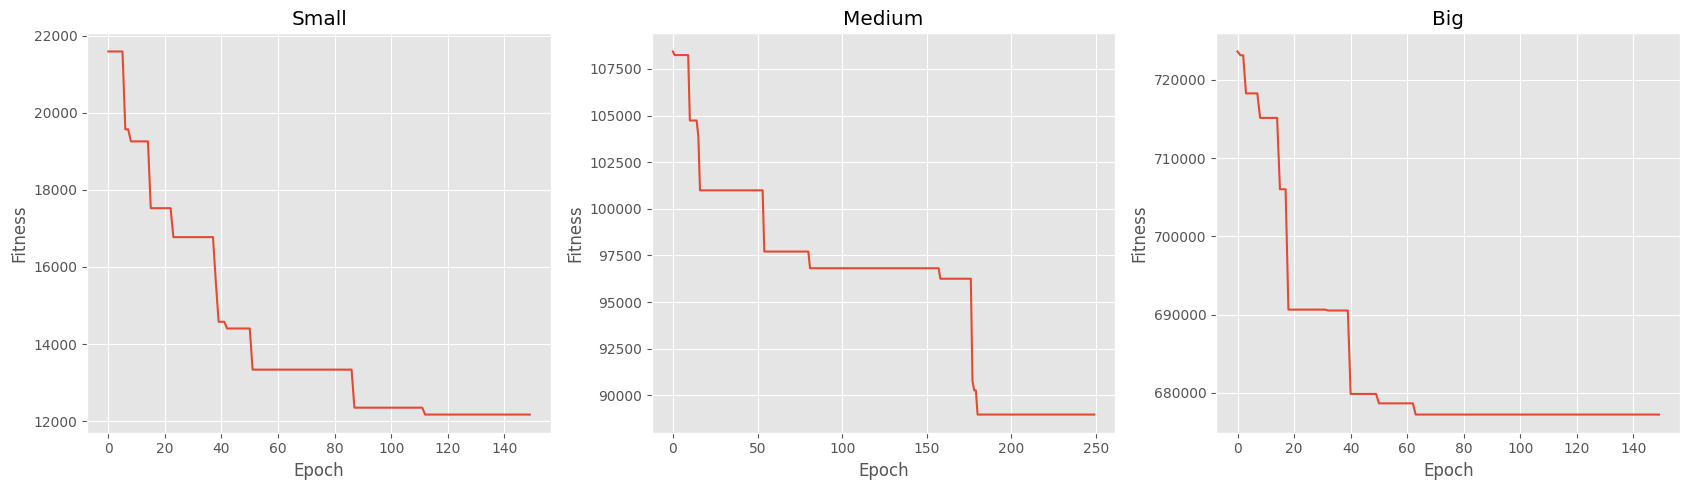

In [280]:
fig, axes = plt.subplots(1, 3, figsize=(17, 5))
axes[0].plot(small_prueba.history_best)
axes[0].set(
    title="Small",
    xlabel="Epoch",
    ylabel="Fitness"
)

axes[1].plot(medium_prueba.history_best)
axes[1].set(
    title="Medium",
    xlabel="Epoch",
    ylabel="Fitness"
)

axes[2].plot(big_prueba.history_best)
axes[2].set(
    title="Big",
    xlabel="Epoch",
    ylabel="Fitness"
)


plt.tight_layout()
plt.show()

In [281]:
prueba_xd = best_solution

# Calcula el costo total sumando todos los precios anidados
total_cost = sum(
    price
    for products in prueba_xd.values()
    for price in products.values()
)

print(f"Costo total: {total_cost:.2f}")

Costo total: 664282.00


In [282]:
#best_solution

In [283]:
#ga.history_elite

In [284]:
'''# Pegar la lista de dicts como string
raw = f"""{small_prueba.history_elite}"""
solutions = ast.literal_eval(raw)

# Convertimos cada cromosoma a cadena canonical para contar unicidad
freq = Counter(map(str, solutions))

# Mostramos un resumen ordenado
for sol, count in freq.most_common():
    print(f"{count} veces → {sol}")'''

'# Pegar la lista de dicts como string\nraw = f"""{small_prueba.history_elite}"""\nsolutions = ast.literal_eval(raw)\n\n# Convertimos cada cromosoma a cadena canonical para contar unicidad\nfreq = Counter(map(str, solutions))\n\n# Mostramos un resumen ordenado\nfor sol, count in freq.most_common():\n    print(f"{count} veces → {sol}")'

## Detalles a desglozar
###  Selección
Parametro: selection_params
* Heuristica
  1. selection_rate

* Métodos
  1. hard
  2. soft

https://www.tutorialspoint.com/genetic_algorithms/genetic_algorithms_mutation.htm

### Crossover
Parametro: crossover_params
* Heurisitica
  1. crossover_rate
  2. inheritance Rate

* Metodos
  1. uniform
  2. sub_tree

https://www.nature.com/articles/s41598-023-39696-0


### Mutation
Parametro: mutation_paramss
* Heuristica
  1. mutation_rate

* Metodos
  1. swap
  2. scramble

https://www.tutorialspoint.com/genetic_algorithms/genetic_algorithms_mutation.htm



### Combinaciones de Parámetros

#### 1) soft + uniform + scramble
```python
# 1) soft + uniform + scramble
selection_params={
    "method": "soft",
    "selection_rate": 0.40
}

crossover_params={
    "method": "uniform",
    "crossover_rate": 0.88,
    "inheritance_rate": 0.50
}

mutation_params={
    "method": "scramble",
    "mutation_rate": 0.0001
}
```

#### 2) soft + uniform + swap
```python
# 2) soft + uniform + swap
selection_params={
    "method": "soft",
    "selection_rate": 0.40
}

crossover_params={
    "method": "uniform",
    "crossover_rate": 0.88,
    "inheritance_rate": 0.50
}

mutation_params={
    "method": "swap",
    "mutation_rate": 0.0001
}
```


#### 3) soft + sub_tree + scramble
```python
# 3) soft + sub_tree + scramble
selection_params={
    "method": "soft",
    "selection_rate": 0.40
}

crossover_params={
    "method": "sub_tree",
    "crossover_rate": 0.88,
    "inheritance_rate": 0.50
}

mutation_params={
    "method": "scramble",
    "mutation_rate": 0.0001
}
```

#### 4) soft + sub_tree + swap
```python
# 4) soft + sub_tree + swap
selection_params={
    "method": "soft",
    "selection_rate": 0.40
}

crossover_params={
    "method": "sub_tree",
    "crossover_rate": 0.88,
    "inheritance_rate": 0.50
}

mutation_params={
    "method": "swap",
    "mutation_rate": 0.0001
}
```

#### 5) hard + uniform + scramble
```python
# 5) hard + uniform + scramble
selection_params={
    "method": "hard",
    "selection_rate": 0.40
}

crossover_params={
    "method": "uniform",
    "crossover_rate": 0.88,
    "inheritance_rate": 0.50
}

mutation_params={
    "method": "scramble",
    "mutation_rate": 0.0001
}
```


#### 6) hard + uniform + swap
```python
# 6) hard + uniform + swap
selection_params={
    "method": "hard",
    "selection_rate": 0.40
}

crossover_params={
    "method": "uniform",
    "crossover_rate": 0.88,
    "inheritance_rate": 0.50
}

mutation_params={
    "method": "swap",
    "mutation_rate": 0.0001
}
```

#### 7) hard + sub_tree + scramble
```python
# 7) hard + sub_tree + scramble
selection_params={
    "method": "hard",
    "selection_rate": 0.40
}

crossover_params={
    "method": "sub_tree",
    "crossover_rate": 0.88,
    "inheritance_rate": 0.50
}

mutation_params={
    "method": "scramble",
    "mutation_rate": 0.0001
}
```

#### 8) hard + sub_tree + swap

```python
selection_params={
    "method": "hard",
    "selection_rate": 0.40
}

crossover_params={
    "method": "sub_tree",
    "crossover_rate": 0.88,
    "inheritance_rate": 0.50
}

mutation_params={
    "method": "swap",
    "mutation_rate": 0.0001
}

```




## Clase Flujo General

In [285]:
problem_set.head()


,problem_cluster,catalog,fuel_price,query,qbf best solution,qbf best value,ga best solution,ga best value,gc best solution,gc best value,gn best solution,gn best value
0,small-3s-4p-f1_10-q1_4-random,problemset/in/small-3s-4p-f1_10-q1_4-random_ca...,1,['Purificadores de aire'],"[array(['Supermercado Nacional', 'Purificadore...",4401.99,"[array(['Supermercado Nacional', 'Purificadore...",4401.99,"[array(['Supermercado Nacional', 'Purificadore...",4401.99,"[array(['Supermercado Nacional', 'Purificadore...",4401.99
1,small-3s-4p-f1_10-q1_4-random,problemset/in/small-3s-4p-f1_10-q1_4-random_ca...,1,"['Purificadores de aire', 'Aceite de girasol',...","[array(['Jumbo', 'Aceite de girasol'], dtype=o...",11270.96,"[array(['Supermercado Nacional', 'Purificadore...",11283.96,"[array(['Jumbo', 'Aceite de girasol'], dtype=o...",11270.96,"[array(['Supermercado Nacional', 'Alfombras'],...",12817.96
2,small-3s-4p-f1_10-q1_4-random,problemset/in/small-3s-4p-f1_10-q1_4-random_ca...,6,['Purificadores de aire'],"[array(['Supermercado Nacional', 'Purificadore...",4501.99,"[array(['Supermercado Nacional', 'Purificadore...",4501.99,"[array(['Supermercado Nacional', 'Purificadore...",4501.99,"[array(['Supermercado Nacional', 'Purificadore...",4501.99
3,small-3s-4p-f1_10-q1_4-random,problemset/in/small-3s-4p-f1_10-q1_4-random_ca...,6,"['Purificadores de aire', 'Pasta de dientes', ...","[array(['Jumbo', 'Pasta de dientes'], dtype=ob...",11400.96,"[array(['Supermercado Nacional', 'Purificadore...",11478.96,"[array(['Jumbo', 'Pasta de dientes'], dtype=ob...",11400.96,"[array(['Supermercado Nacional', 'Alfombras'],...",12917.96
4,small-5s-10p-f0_10-q1_10-random,problemset/in/small-5s-10p-f0_10-q1_10-random_...,0,['Televisores'],"[array(['Super Pola', 'Televisores'], dtype=ob...",619.99,"[array(['Super Pola', 'Televisores'], dtype=ob...",619.99,"[array(['Super Pola', 'Televisores'], dtype=ob...",619.99,"[array(['Bravo', 'Televisores'], dtype=object)]",3638.99


In [286]:
class FlujoGeneral:
  def __init__(self, compra_genetica:str, ga:GAOptimization, problem_set:pd.DataFrame, general_folder:str, small_params:dict, medium_params:dict, big_params:dict):
    self.compra_genetica = compra_genetica
    self.ga = ga
    self.problem_set = problem_set
    self.general_folder = general_folder
    self.small_params = small_params
    self.medium_params = medium_params
    self.big_params = big_params

    self.insights = {
    "cluster_name": [],
    "fuel_price": [],
    "query": [],
    "ga_cluster_solution": [],
    "cluster_best_value": [],
    "our_ga_best_solution": [],
    "our_ga_best_value": [],
    "pop_size": [],
    "penalty_factor": [],
    "cluster_time": [],
    "memory used (mb)": [],
    "iters": [],
    "mutation_method": [],
    "mutation_prob": [],
    "selection_method": [],      # Agregado
    "selection_prob": []         # Agregado
    }


  def conectar_proyecto(self):
    directorio_actual = os.getcwd()
    try:
      if self.compra_genetica not in directorio_actual:
        print("No estamos en ", compra_genetica)
        os.chdir(self.compra_genetica)
        print("Trasladado hacia", os.getcwd())

      else:
        print("Ya estamos en ", self.compra_genetica)
        pass
    except FileNotFoundError as flne:
      print("Hubo un error: ", flne)

    finally:
        general = os.path.join(self.compra_genetica, f"{self.general_folder}")
        os.makedirs(general, mode=0o777, exist_ok=True)

        os.chdir(general)
        print(general)
        small_path = os.path.join(general, "small")
        small_log_path = os.path.join(small_path, "logs")

        medium_path = os.path.join(general, "medium")
        medium_log_path = os.path.join(medium_path, "logs")

        big_path = os.path.join(general, "big")
        big_log_path = os.path.join(big_path, "logs")


        os.makedirs(small_path,  mode=0o777, exist_ok=True)
        os.makedirs(small_log_path,  mode=0o777, exist_ok=True)

        os.makedirs(medium_path, mode=0o777, exist_ok=True)
        os.makedirs(medium_log_path, mode=0o777, exist_ok=True)

        os.makedirs(big_path, mode=0o777, exist_ok=True)
        os.makedirs(big_log_path, mode=0o777, exist_ok=True)

        return general, small_path, small_log_path, medium_path, medium_log_path, big_path, big_log_path


  def make_query(self, mejor_cromosoma: dict, query, ga_instance) -> tuple[list[list[str]], float]:

    sequence = []
    product_cost = 0
    stores_used = set()

    # Construir secuencia de [tienda, producto]
    for tienda, productos in mejor_cromosoma.items():
        for producto, precio in productos.items():
            if producto in query:
                sequence.append([tienda, producto])
                product_cost += precio
                stores_used.add(tienda)

    # Calcular costo de transporte
    route = ["Casa"] + list(stores_used) + ["Casa"]
    finite = ga_instance.distance_matrix.replace(np.inf, np.nan).values
    max_dist = np.nanmax(finite)
    penalty = max_dist * ga_instance.fuel_price * ga_instance.penalty_factor

    transport_cost = 0.0
    for i in range(len(route) - 1):
        dist = ga_instance.distance_matrix.at[route[i], route[i+1]]
        transport_cost += penalty if np.isinf(dist) else dist * ga_instance.fuel_price

    total_cost = product_cost + transport_cost
    return sequence, total_cost



  def flujo_small(self, idx, small_log_path):
    ga = self.ga(
          project_path=self.compra_genetica,
          indice=idx,
          pop_size=self.small_params["pop_size"],
          penalty_factor = self.small_params['penalty_factor'],

          selection_params= self.small_params["selection_params"]
          ,

          crossover_params= self.small_params['crossover_params'],

          mutation_params=self.small_params["mutation_params"],

          epoch=self.small_params['epoch'],
          log_path=small_log_path
      )
    best_score, best_solution = ga.run()
    self.insights['iters'].append(ga.epoch)
    return ga, best_score, best_solution

  def flujo_medium(self, idx, medium_log_path):
    ga = self.ga(
          project_path=self.compra_genetica,
          indice=idx,
          pop_size=self.medium_params["pop_size"],
          penalty_factor = self.medium_params["penalty_factor"],

          selection_params=self.medium_params['selection_params'],

          crossover_params=self.medium_params['crossover_params'],

          mutation_params=self.medium_params['mutation_params'],

          epoch=self.medium_params['epoch'],
          log_path=medium_log_path
      )
    best_score, best_solution = ga.run()
    self.insights['iters'].append(ga.epoch)
    return ga, best_score, best_solution

  def flujo_big(self, idx, big_log_path):
    ga = self.ga(
          project_path=self.compra_genetica,
          indice=idx,
          pop_size=self.big_params['pop_size'],
          penalty_factor = self.big_params["penalty_factor"],

          selection_params=self.big_params["selection_params"],

          crossover_params=self.big_params['crossover_params'],

          mutation_params=self.big_params['mutation_params'],

          epoch=self.big_params['epoch'],
          log_path=big_log_path
    )

    best_score, best_solution = ga.run()
    self.insights['iters'].append(ga.epoch)
    return ga, best_score, best_solution

  def flujo_general(self):
    general, small_path, small_log_path, medium_path, medium_log_path, big_path, big_log_path = self.conectar_proyecto()

    for idx, row in self.problem_set.iterrows():
      if "small" in row["problem_cluster"]:
        self.insights["cluster_name"].append(row["problem_cluster"])
        self.insights["fuel_price"].append(row["fuel_price"])
        self.insights['query'].append(row['query'])

        self.insights['pop_size'].append(self.small_params['pop_size'])
        self.insights['penalty_factor'].append(self.small_params['penalty_factor'])

        initial_time = time.time()
        initial_memory =  psutil.Process(os.getpid()).memory_info().rss
        ga, best_score, best_solution = self.flujo_small(idx, small_log_path)
        self.insights['cluster_time'].append(time.time() - initial_time)

        final_memory = psutil.Process(os.getpid()).memory_info().rss

        self.insights['memory used (mb)'].append((final_memory - initial_memory) / (1024 * 1024))

        self.insights['mutation_method'].append(self.small_params['mutation_params']['method'])
        self.insights['mutation_prob'].append(self.small_params['mutation_params']['mutation_rate'])
        self.insights['selection_method'].append(self.small_params['selection_params']['method'])
        self.insights['selection_prob'].append(self.small_params['selection_params']['selection_rate'])
        self.insights['ga_cluster_solution'].append(best_solution)
        self.insights['cluster_best_value'].append(best_score)

        ga_best_solution, ga_best_value = self.make_query(best_solution, row['query'], ga)
        self.insights['our_ga_best_solution'].append(ga_best_solution)
        self.insights['our_ga_best_value'].append(ga_best_value)


        print("Mejor fitness:", best_score)
        print("Mejor solución:", best_solution, "\n")
        if os.getcwd() != small_path:
          os.chdir(small_path)
          with open(f"{idx}.json", "w") as f:
            json.dump(best_solution, f, sort_keys=False, indent=4)


      elif "medium" in row["problem_cluster"]:
        self.insights["cluster_name"].append(row["problem_cluster"])
        self.insights["fuel_price"].append(row["fuel_price"])
        self.insights['query'].append(row['query'])
        self.insights['pop_size'].append(self.medium_params['pop_size'])
        self.insights['penalty_factor'].append(self.medium_params['penalty_factor'])

        initial_time = time.time()
        initial_memory =  psutil.Process(os.getpid()).memory_info().rss
        ga, best_score, best_solution = self.flujo_medium(idx, medium_log_path)
        self.insights['cluster_time'].append(time.time() - initial_time)

        final_memory = psutil.Process(os.getpid()).memory_info().rss
        self.insights['memory used (mb)'].append((final_memory - initial_memory) / (1024 * 1024))

        self.insights['mutation_method'].append(self.medium_params['mutation_params']['method'])
        self.insights['mutation_prob'].append(self.medium_params['mutation_params']['mutation_rate'])
        self.insights['selection_method'].append(self.medium_params['selection_params']['method'])
        self.insights['selection_prob'].append(self.medium_params['selection_params']['selection_rate'])
        self.insights['ga_cluster_solution'].append(best_solution)
        self.insights['cluster_best_value'].append(best_score)

        ga_best_solution, ga_best_value = self.make_query(best_solution, row['query'], ga)
        self.insights['our_ga_best_solution'].append(ga_best_solution)
        self.insights['our_ga_best_value'].append(ga_best_value)

        print("Mejor fitness:", best_score)
        print("Mejor solución:", best_solution, "\n")
        if os.getcwd() != medium_path:
          os.chdir(medium_path)
          with open(f"{idx}.json", "w") as f:
            json.dump(best_solution, f, sort_keys=False, indent=4)


      elif "big" in row["problem_cluster"]:
        self.insights["cluster_name"].append(row["problem_cluster"])
        self.insights["fuel_price"].append(row["fuel_price"])
        self.insights['query'].append(row['query'])
        self.insights['pop_size'].append(self.big_params['pop_size'])
        self.insights['penalty_factor'].append(self.big_params["penalty_factor"])

        initial_time = time.time()
        initial_memory =  psutil.Process(os.getpid()).memory_info().rss
        ga, best_score, best_solution = self.flujo_big(idx, big_log_path)
        self.insights['cluster_time'].append(time.time() - initial_time)

        final_memory = psutil.Process(os.getpid()).memory_info().rss
        self.insights['memory used (mb)'].append((final_memory - initial_memory) / (1024 * 1024))


        self.insights['mutation_method'].append(self.big_params['mutation_params']['method'])
        self.insights['mutation_prob'].append(self.big_params['mutation_params']['mutation_rate'])
        self.insights['selection_method'].append(self.big_params['selection_params']['method'])
        self.insights['selection_prob'].append(self.big_params['selection_params']['selection_rate'])
        self.insights['ga_cluster_solution'].append(best_solution)
        self.insights['cluster_best_value'].append(best_score)

        ga_best_solution, ga_best_value = self.make_query(best_solution, row['query'], ga)
        self.insights['our_ga_best_solution'].append(ga_best_solution)
        self.insights['our_ga_best_value'].append(ga_best_value)

        print("Mejor fitness:", best_score)
        print("Mejor solución:", best_solution, "\n")
        if os.getcwd() != big_path:
          os.chdir(big_path)
          with open(f"{idx}.json", "w") as f:
            json.dump(best_solution, f, sort_keys=False, indent=4)

    print("Llegamos a un final.")
    return pd.DataFrame(self.insights), general

In [287]:
smalls =  problem_set.loc[problem_set["problem_cluster"].str.contains('small', case=False, na=False)]
mediums =  problem_set.loc[problem_set["problem_cluster"].str.contains('medium', case=False, na=False)]
bigs =  problem_set.loc[problem_set["problem_cluster"].str.contains('big', case=False, na=False)]

print("Cantidad de smalls:", len(smalls))
print("Cantidad de mediums:", len(mediums))
print("Cantidad de bigs", len(bigs))

Cantidad de smalls: 100
Cantidad de mediums: 24
Cantidad de bigs 12


##  Ejecución del Flujo General (Ejecutar solo si no se tiene la carpeta "Validación")

#### 1. Soft + Uniform + Scramble

In [180]:
small_params = {
    "epoch": 100,
    "pop_size": 10,
    "penalty_factor": 9.0,
    "selection_params": {
        "method": "soft",
        "selection_rate": 0.66
    },
    "crossover_params": {
        "method": "uniform",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },
    "mutation_params": {
        "method": "scramble",
        "mutation_rate": 0.10
    }
}

medium_params = {
    "epoch": 150,
    "pop_size": 40,
    "penalty_factor": 18.0,
    "selection_params": {
        "method": "soft",

        "selection_rate": 0.50
    },
    "crossover_params": {
        "method": "uniform",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },

    "mutation_params": {
        "method": "scramble",
        "mutation_rate": 0.15
    }
}


big_params = {
    "epoch": 200,
    "pop_size": 80,
    "penalty_factor": 27.0,
    "selection_params": {
        "method": "soft",
        "selection_rate": 0.40
    },
    "crossover_params": {
        "method": "uniform",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },
    "mutation_params": {
        "method": "scramble",
        "mutation_rate": 0.20
    }
}

In [181]:
fg1  = FlujoGeneral(compra_genetica, GAOptimization, problem_set, "Soft + Uniform + Scramble", small_params, medium_params, big_params)
soft_uniform_scramble_df, soft_uniform_scramble_path = fg1.flujo_general()

No estamos en  /content/drive/MyDrive/Proyecto - Compra Genética
Trasladado hacia /content/drive/MyDrive/Proyecto - Compra Genética
/content/drive/MyDrive/Proyecto - Compra Genética/Soft + Uniform + Scramble
Final log path: /content/drive/MyDrive/Proyecto - Compra Genética/Soft + Uniform + Scramble/small/logs/0.txt
/content/drive/MyDrive/Proyecto - Compra Genética


KeyboardInterrupt: 

In [ ]:
soft_uniform_scramble_df

In [ ]:
mejor_cromosoma = soft_uniform_scramble_df.loc[12, "ga_cluster_solution"]

mejor_cromosoma

In [ ]:
query_prueba = soft_uniform_scramble_df.loc[12, "query"]
query_prueba

##### Manipulación de los logs en consola

In [ ]:
# Lista los logs realizados hasta el momento

!ls -la "/content/drive/MyDrive/Proyecto - Compra Genética/Soft + Uniform + Scramble/small/logs"

In [ ]:
#!head -n 100 "/content/drive/MyDrive/Proyecto - Compra Genética/General/small/logs/0.txt"


# Borrra de forma forzada los logs (No descomentar)
#!rm -rf "/content/drive/MyDrive/Proyecto - Compra Genética/General/small/logs"/*

#### 2. Soft + Uniform + Swap

In [ ]:
small_params = {
    "epoch": 100,
    "pop_size": 10,
    "penalty_factor": 9.0,
    "selection_params": {
        "method": "soft",
        "selection_rate": 0.66
    },
    "crossover_params": {
        "method": "uniform",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },
    "mutation_params": {
        "method": "swap",
        "mutation_rate": 0.10
    }
}

medium_params = {
    "epoch": 150,
    "pop_size": 40,
    "penalty_factor": 18.0,
    "selection_params": {
        "method": "soft",

        "selection_rate": 0.50
    },
    "crossover_params": {
        "method": "uniform",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },

    "mutation_params": {
        "method": "swap",
        "mutation_rate": 0.15
    }
}


big_params = {
    "epoch": 200,
    "pop_size": 80,
    "penalty_factor": 27.0,
    "selection_params": {
        "method": "soft",
        "selection_rate": 0.40
    },
    "crossover_params": {
        "method": "uniform",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },
    "mutation_params": {
        "method": "swap",
        "mutation_rate": 0.20
    }
}

In [ ]:
fg2 =  FlujoGeneral(compra_genetica, GAOptimization, problem_set, "Soft + Uniform + Swap", small_params, medium_params, big_params)
soft_uniform_swap_df, soft_uniform_swap_path  = fg2.flujo_general()

##### Manipulación de los logs en consola

In [ ]:
# Lista los logs realizados hasta el momento

!ls -la "/content/drive/MyDrive/Proyecto - Compra Genética/Soft + Uniform + Swap/small/logs"

In [ ]:
#!head -n 100 "/content/drive/MyDrive/Proyecto - Compra Genética/General/small/logs/0.txt"


# Borrra de forma forzada los logs (No descomentar)
#!rm -rf "/content/drive/MyDrive/Proyecto - Compra Genética/General/small/logs"/*

#### 3. Soft + Sub_tree + Scramble

In [ ]:
small_params = {
    "epoch": 100,
    "pop_size": 10,
    "penalty_factor": 9.0,
    "selection_params": {
        "method": "soft",
        "selection_rate": 0.66
    },
    "crossover_params": {
        "method": "sub_tree",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },
    "mutation_params": {
        "method": "scramble",
        "mutation_rate": 0.10
    }
}

medium_params = {
    "epoch": 150,
    "pop_size": 40,
    "penalty_factor": 18.0,
    "selection_params": {
        "method": "soft",

        "selection_rate": 0.50
    },
    "crossover_params": {
        "method": "sub_tree",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },

    "mutation_params": {
        "method": "scramble",
        "mutation_rate": 0.15
    }
}


big_params = {
    "epoch": 200,
    "pop_size": 80,
    "penalty_factor": 27.0,
    "selection_params": {
        "method": "soft",
        "selection_rate": 0.40
    },
    "crossover_params": {
        "method": "sub_tree",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },
    "mutation_params": {
        "method": "scramble",
        "mutation_rate": 0.20
    }
}

In [ ]:
fg3 = FlujoGeneral(compra_genetica, GAOptimization, problem_set, "Soft + Sub_tree + Scramble", small_params, medium_params, big_params)
soft_sub_tree_scramble_df, soft_sub_tree_scramble_path = fg3.flujo_general()

##### Manipulación de los logs en consola

In [ ]:
# Lista los logs realizados hasta el momento

!ls -la "/content/drive/MyDrive/Proyecto - Compra Genética/Soft + Sub_tree + Scramble/small/logs"

In [ ]:
#!head -n 100 "/content/drive/MyDrive/Proyecto - Compra Genética/General/small/logs/0.txt"


# Borrra de forma forzada los logs (No descomentar)
#!rm -rf "/content/drive/MyDrive/Proyecto - Compra Genética/General/small/logs"/*

#### 4. Soft + Sub_tree + Swap

In [ ]:
small_params = {
    "epoch": 100,
    "pop_size": 10,
    "penalty_factor": 9.0,
    "selection_params": {
        "method": "soft",
        "selection_rate": 0.66
    },
    "crossover_params": {
        "method": "sub_tree",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },
    "mutation_params": {
        "method": "swap",
        "mutation_rate": 0.10
    }
}

medium_params = {
    "epoch": 150,
    "pop_size": 40,
    "penalty_factor": 18.0,
    "selection_params": {
        "method": "soft",

        "selection_rate": 0.50
    },
    "crossover_params": {
        "method": "sub_tree",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },

    "mutation_params": {
        "method": "swap",
        "mutation_rate": 0.15
    }
}


big_params = {
    "epoch": 200,
    "pop_size": 80,
    "penalty_factor": 27.0,
    "selection_params": {
        "method": "soft",
        "selection_rate": 0.40
    },
    "crossover_params": {
        "method": "sub_tree",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },
    "mutation_params": {
        "method": "swap",
        "mutation_rate": 0.20
    }
}

In [ ]:
fg4 = FlujoGeneral(compra_genetica, GAOptimization, problem_set, "Soft + Sub_tree + Swap", small_params, medium_params, big_params)
soft_sub_tree_swap_df, soft_sub_tree_swap_path = fg4.flujo_general()

##### Manipulación de los logs en consola

In [ ]:
# Lista los logs realizados hasta el momento

!ls -la "/content/drive/MyDrive/Proyecto - Compra Genética/Soft + Sub_tree + Swap/small/logs"

In [ ]:
#!head -n 100 "/content/drive/MyDrive/Proyecto - Compra Genética/General/small/logs/0.txt"


# Borrra de forma forzada los logs (No descomentar)
#!rm -rf "/content/drive/MyDrive/Proyecto - Compra Genética/General/small/logs"/*

#### 5. Hard + Uniform + Scramble

In [ ]:
small_params = {
    "epoch": 100,
    "pop_size": 10,
    "penalty_factor": 9.0,
    "selection_params": {
        "method": "hard",
        "selection_rate": 0.66
    },
    "crossover_params": {
        "method": "uniform",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },
    "mutation_params": {
        "method": "scramble",
        "mutation_rate": 0.10
    }
}

medium_params = {
    "epoch": 150,
    "pop_size": 40,
    "penalty_factor": 18.0,
    "selection_params": {
        "method": "hard",

        "selection_rate": 0.50
    },
    "crossover_params": {
        "method": "uniform",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },

    "mutation_params": {
        "method": "scramble",
        "mutation_rate": 0.15
    }
}


big_params = {
    "epoch": 200,
    "pop_size": 80,
    "penalty_factor": 27.0,
    "selection_params": {
        "method": "hard",
        "selection_rate": 0.40
    },
    "crossover_params": {
        "method": "uniform",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },
    "mutation_params": {
        "method": "scramble",
        "mutation_rate": 0.20
    }
}

In [ ]:
fg5 = FlujoGeneral(compra_genetica, GAOptimization, problem_set, "Hard + Uniform + Scramble", small_params, medium_params, big_params)
hard_uniform_scramble_df, hard_uniform_scramble_path = fg5.flujo_general()

##### Manipulación de los logs en consola

In [ ]:
# Lista los logs realizados hasta el momento

!ls -la "/content/drive/MyDrive/Proyecto - Compra Genética/Hard + Uniform + Scramble/small/logs"

In [ ]:
#!head -n 100 "/content/drive/MyDrive/Proyecto - Compra Genética/General/small/logs/0.txt"


# Borrra de forma forzada los logs (No descomentar)
#!rm -rf "/content/drive/MyDrive/Proyecto - Compra Genética/General/small/logs"/*

#### 6. Hard + Uniform + Swap

In [ ]:
small_params = {
    "epoch": 100,
    "pop_size": 10,
    "penalty_factor": 9.0,
    "selection_params": {
        "method": "hard",
        "selection_rate": 0.66
    },
    "crossover_params": {
        "method": "uniform",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },
    "mutation_params": {
        "method": "swap",
        "mutation_rate": 0.10
    }
}

medium_params = {
    "epoch": 150,
    "pop_size": 40,
    "penalty_factor": 18.0,
    "selection_params": {
        "method": "hard",

        "selection_rate": 0.50
    },
    "crossover_params": {
        "method": "uniform",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },

    "mutation_params": {
        "method": "swap",
        "mutation_rate": 0.15
    }
}


big_params = {
    "epoch": 200,
    "pop_size": 80,
    "penalty_factor": 27.0,
    "selection_params": {
        "method": "hard",
        "selection_rate": 0.40
    },
    "crossover_params": {
        "method": "uniform",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },
    "mutation_params": {
        "method": "swap",
        "mutation_rate": 0.20
    }
}

In [ ]:
fg6 = FlujoGeneral(compra_genetica, GAOptimization, problem_set, "Hard + Uniform + Swap", small_params, medium_params, big_params)
hard_uniform_swap_df, hard_uniform_swap_path = fg6.flujo_general()

##### Manipulación de los logs en consola

In [ ]:
# Lista los logs realizados hasta el momento

!ls -la "/content/drive/MyDrive/Proyecto - Compra Genética/Hard + Uniform + Swap/small/logs"

In [ ]:
#!head -n 100 "/content/drive/MyDrive/Proyecto - Compra Genética/General/small/logs/0.txt"


# Borrra de forma forzada los logs (No descomentar)
#!rm -rf "/content/drive/MyDrive/Proyecto - Compra Genética/General/small/logs"/*

#### 7. Hard + Sub_tree + Scramble

In [ ]:
small_params = {
    "epoch": 100,
    "pop_size": 10,
    "penalty_factor": 9.0,
    "selection_params": {
        "method": "hard",
        "selection_rate": 0.66
    },
    "crossover_params": {
        "method": "sub_tree",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },
    "mutation_params": {
        "method": "scramble",
        "mutation_rate": 0.10
    }
}

medium_params = {
    "epoch": 150,
    "pop_size": 40,
    "penalty_factor": 18.0,
    "selection_params": {
        "method": "hard",

        "selection_rate": 0.50
    },
    "crossover_params": {
        "method": "sub_tree",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },

    "mutation_params": {
        "method": "scramble",
        "mutation_rate": 0.15
    }
}


big_params = {
    "epoch": 200,
    "pop_size": 80,
    "penalty_factor": 27.0,
    "selection_params": {
        "method": "hard",
        "selection_rate": 0.40
    },
    "crossover_params": {
        "method": "sub_tree",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },
    "mutation_params": {
        "method": "scramble",
        "mutation_rate": 0.20
    }
}

In [ ]:
fg7  = FlujoGeneral(compra_genetica, GAOptimization, problem_set, "Hard + Sub_tree + Scramble", small_params, medium_params, big_params)
hard_sub_tree_scramble_df, hard_sub_tree_scramble_path = fg7.flujo_general()

##### Manipulación de los logs en consola

In [ ]:
# Lista los logs realizados hasta el momento

!ls -la "/content/drive/MyDrive/Proyecto - Compra Genética/Hard + Sub_tree + Scramble/small/logs"

In [ ]:
#!head -n 100 "/content/drive/MyDrive/Proyecto - Compra Genética/General/small/logs/0.txt"


# Borrra de forma forzada los logs (No descomentar)
#!rm -rf "/content/drive/MyDrive/Proyecto - Compra Genética/General/small/logs"/*

#### 8. Hard + Sub_tree + Swap

In [ ]:
small_params = {
    "epoch": 100,
    "pop_size": 10,
    "penalty_factor": 9.0,
    "selection_params": {
        "method": "hard",
        "selection_rate": 0.66
    },
    "crossover_params": {
        "method": "sub_tree",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },
    "mutation_params": {
        "method": "swap",
        "mutation_rate": 0.10
    }
}

medium_params = {
    "epoch": 150,
    "pop_size": 40,
    "penalty_factor": 18.0,
    "selection_params": {
        "method": "hard",

        "selection_rate": 0.50
    },
    "crossover_params": {
        "method": "sub_tree",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },

    "mutation_params": {
        "method": "swap",
        "mutation_rate": 0.15
    }
}


big_params = {
    "epoch": 200,
    "pop_size": 80,
    "penalty_factor": 27.0,
    "selection_params": {
        "method": "hard",
        "selection_rate": 0.40
    },
    "crossover_params": {
        "method": "sub_tree",
        "crossover_rate": 0.88,
        "inheritance_rate": 0.50
    },
    "mutation_params": {
        "method": "swap",
        "mutation_rate": 0.20
    }
}

In [ ]:
fg8 = FlujoGeneral(compra_genetica, GAOptimization, problem_set, "Hard + Sub_tree + Swap", small_params, medium_params, big_params)
hard_sub_tree_swap_df, hard_sub_tree_swap_path = fg8.flujo_general()

##### Manipulación de los logs en consola

In [ ]:
# Lista los logs realizados hasta el momento

!ls -la "/content/drive/MyDrive/Proyecto - Compra Genética/Hard + Sub_tree + Swap/small/logs"

In [ ]:
#!head -n 100 "/content/drive/MyDrive/Proyecto - Compra Genética/General/small/logs/0.txt"


# Borra de forma forzada los logs (No descomentar)
#!rm -rf "/content/drive/MyDrive/Proyecto - Compra Genética/General/small/logs"/*

## Validación | Consultas



#### Asgurandonos de que todo este cargado

In [288]:
if os.getcwd() != "/content/drive/MyDrive/Proyecto - Compra Genética":
    os.chdir("/content/drive/MyDrive/Proyecto - Compra Genética")

os.makedirs("Validación", mode=0o777, exist_ok=True)
os.chdir("Validación")

# Lista de nombres de archivos y variables (como strings)
nombres = [
    "soft_uniform_scramble_df",
    "soft_uniform_swap_df",
    "soft_sub_tree_scramble_df",
    "soft_sub_tree_swap_df",
    "hard_uniform_scramble_df",
    "hard_uniform_swap_df",
    "hard_sub_tree_scramble_df",
    "hard_sub_tree_swap_df"
]

# Cargar o guardar
for nombre in nombres:
    archivo = nombre + ".csv"
    if not os.path.exists(archivo):
        print(f"No existe {archivo}, debes crear el DataFrame '{nombre}' antes.")
    else:
        globals()[nombre] = pd.read_csv(archivo)


### Métricas de Valores Continuos

Sea $(O_i)$ el valor observado y $(P_i)$ el valor predicho para $i = 1, \dots, n$.

#### Error puntual
$[ E_i = O_i - P_i ]$

#### Error Absoluto
$[ AE_i = |O_i - P_i| ]$

#### Error Negativo Promedio
Sea
$[ I = \{ i \mid O_i - P_i < 0 \} ]$
entonces
$[ \text{Error Negativo Promedio} = \frac{1}{|I|} \sum_{i \in I} (O_i - P_i) ]$

#### Error Absoluto Promedio (MAE)
$[ \text{MAE} = \frac{1}{n} \sum_{i=1}^n |O_i - P_i| ]$

#### Error Cuadrado Promedio (MSE)
$[ \text{MSE} = \frac{1}{n} \sum_{i=1}^n (O_i - P_i)^2 ]$

In [289]:
problem_set.head()

,problem_cluster,catalog,fuel_price,query,qbf best solution,qbf best value,ga best solution,ga best value,gc best solution,gc best value,gn best solution,gn best value
0,small-3s-4p-f1_10-q1_4-random,problemset/in/small-3s-4p-f1_10-q1_4-random_ca...,1,['Purificadores de aire'],"[array(['Supermercado Nacional', 'Purificadore...",4401.99,"[array(['Supermercado Nacional', 'Purificadore...",4401.99,"[array(['Supermercado Nacional', 'Purificadore...",4401.99,"[array(['Supermercado Nacional', 'Purificadore...",4401.99
1,small-3s-4p-f1_10-q1_4-random,problemset/in/small-3s-4p-f1_10-q1_4-random_ca...,1,"['Purificadores de aire', 'Aceite de girasol',...","[array(['Jumbo', 'Aceite de girasol'], dtype=o...",11270.96,"[array(['Supermercado Nacional', 'Purificadore...",11283.96,"[array(['Jumbo', 'Aceite de girasol'], dtype=o...",11270.96,"[array(['Supermercado Nacional', 'Alfombras'],...",12817.96
2,small-3s-4p-f1_10-q1_4-random,problemset/in/small-3s-4p-f1_10-q1_4-random_ca...,6,['Purificadores de aire'],"[array(['Supermercado Nacional', 'Purificadore...",4501.99,"[array(['Supermercado Nacional', 'Purificadore...",4501.99,"[array(['Supermercado Nacional', 'Purificadore...",4501.99,"[array(['Supermercado Nacional', 'Purificadore...",4501.99
3,small-3s-4p-f1_10-q1_4-random,problemset/in/small-3s-4p-f1_10-q1_4-random_ca...,6,"['Purificadores de aire', 'Pasta de dientes', ...","[array(['Jumbo', 'Pasta de dientes'], dtype=ob...",11400.96,"[array(['Supermercado Nacional', 'Purificadore...",11478.96,"[array(['Jumbo', 'Pasta de dientes'], dtype=ob...",11400.96,"[array(['Supermercado Nacional', 'Alfombras'],...",12917.96
4,small-5s-10p-f0_10-q1_10-random,problemset/in/small-5s-10p-f0_10-q1_10-random_...,0,['Televisores'],"[array(['Super Pola', 'Televisores'], dtype=ob...",619.99,"[array(['Super Pola', 'Televisores'], dtype=ob...",619.99,"[array(['Super Pola', 'Televisores'], dtype=ob...",619.99,"[array(['Bravo', 'Televisores'], dtype=object)]",3638.99


In [290]:
profe_ga_best_value = problem_set["ga best value"]
profe_ga_best_solution = problem_set["ga best solution"]

profe_qbf_best_value = problem_set["qbf best value"]
profe_qbf_best_solution = problem_set["qbf best solution"]

profe_gc_best_value = problem_set["gc best value"]
profe_gc_best_solution = problem_set["gc best solution"]

profe_gn_best_value = problem_set["gn best value"]
profe_gn_best_solution = problem_set["gn best solution"]

In [291]:
## ERRORES
E_soft_uniform_scramble = profe_ga_best_value - soft_uniform_scramble_df["our_ga_best_value"]
E_soft_uniform_swap = profe_ga_best_value - soft_uniform_swap_df["our_ga_best_value"]
E_soft_sub_tree_scramble = profe_ga_best_value - soft_sub_tree_scramble_df["our_ga_best_value"]
E_soft_sub_tree_swap = profe_ga_best_value - soft_sub_tree_swap_df["our_ga_best_value"]
E_hard_uniform_scramble = profe_ga_best_value - hard_uniform_scramble_df["our_ga_best_value"]
E_hard_uniform_swap = profe_ga_best_value - hard_uniform_swap_df["our_ga_best_value"]
E_hard_sub_tree_scramble = profe_ga_best_value - hard_sub_tree_scramble_df["our_ga_best_value"]
E_hard_sub_tree_swap = profe_ga_best_value - hard_sub_tree_swap_df['our_ga_best_value']


### Errores Absolutos
AE_soft_uniform_scramble = abs(E_soft_uniform_scramble)
AE_soft_uniform_swap = abs(E_soft_uniform_swap)
AE_soft_sub_tree_scramble = abs(E_soft_sub_tree_scramble)
AE_soft_sub_tree_swap = abs(E_soft_sub_tree_swap)
AE_hard_uniform_scramble = abs(E_hard_uniform_scramble)
AE_hard_uniform_swap = abs(E_hard_uniform_swap)
AE_hard_sub_tree_scramble = abs(E_hard_sub_tree_scramble)
AE_hard_sub_tree_swap = abs(E_hard_sub_tree_swap)


## Errores Negativos Promedios
ENP_soft_uniform_scramble = E_soft_uniform_scramble[E_soft_uniform_scramble < 0].mean()
ENP_soft_uniform_swap = E_soft_uniform_swap[E_soft_uniform_swap < 0].mean()
ENP_soft_sub_tree_scramble = E_soft_sub_tree_scramble[E_soft_sub_tree_scramble < 0].mean()
ENP_soft_sub_tree_swap = E_soft_sub_tree_swap[E_soft_sub_tree_swap < 0].mean()
ENP_hard_uniform_scramble = E_hard_uniform_scramble[E_hard_uniform_scramble < 0].mean()
ENP_hard_uniform_swap = E_hard_uniform_swap[E_hard_uniform_swap < 0].mean()
ENP_hard_sub_tree_scramble = E_hard_sub_tree_scramble[E_hard_sub_tree_scramble < 0].mean()
ENP_hard_sub_tree_swap = E_hard_sub_tree_swap[E_hard_sub_tree_swap < 0].mean()


## ERRORES ABSOLUTOS PROMEDIOS
MAE_soft_uniform_scramble = AE_soft_uniform_scramble.mean()
MAE_soft_uniform_swap = AE_soft_uniform_swap.mean()
MAE_soft_sub_tree_scramble = AE_soft_sub_tree_scramble.mean()
MAE_soft_sub_tree_swap = AE_soft_sub_tree_swap.mean()
MAE_hard_uniform_scramble = AE_hard_uniform_scramble.mean()
MAE_hard_uniform_swap = AE_hard_uniform_swap.mean()
MAE_hard_sub_tree_scramble = AE_hard_sub_tree_scramble.mean()
MAE_hard_sub_tree_swap = AE_hard_sub_tree_swap.mean()


## Errores Cuadrados Promedios
MSE_soft_uniform_scramble = (E_soft_uniform_scramble**2).mean()
MSE_soft_uniform_swap = (E_soft_uniform_swap**2).mean()
MSE_soft_sub_tree_scramble = (E_soft_sub_tree_scramble**2).mean()
MSE_soft_sub_tree_swap = (E_soft_sub_tree_swap**2).mean()
MSE_hard_uniform_scramble = (E_hard_uniform_scramble**2).mean()
MSE_hard_uniform_swap = (E_hard_uniform_swap**2).mean()
MSE_hard_sub_tree_scramble = (E_hard_sub_tree_scramble**2).mean()
MSE_hard_sub_tree_swap = (E_hard_sub_tree_swap**2).mean()

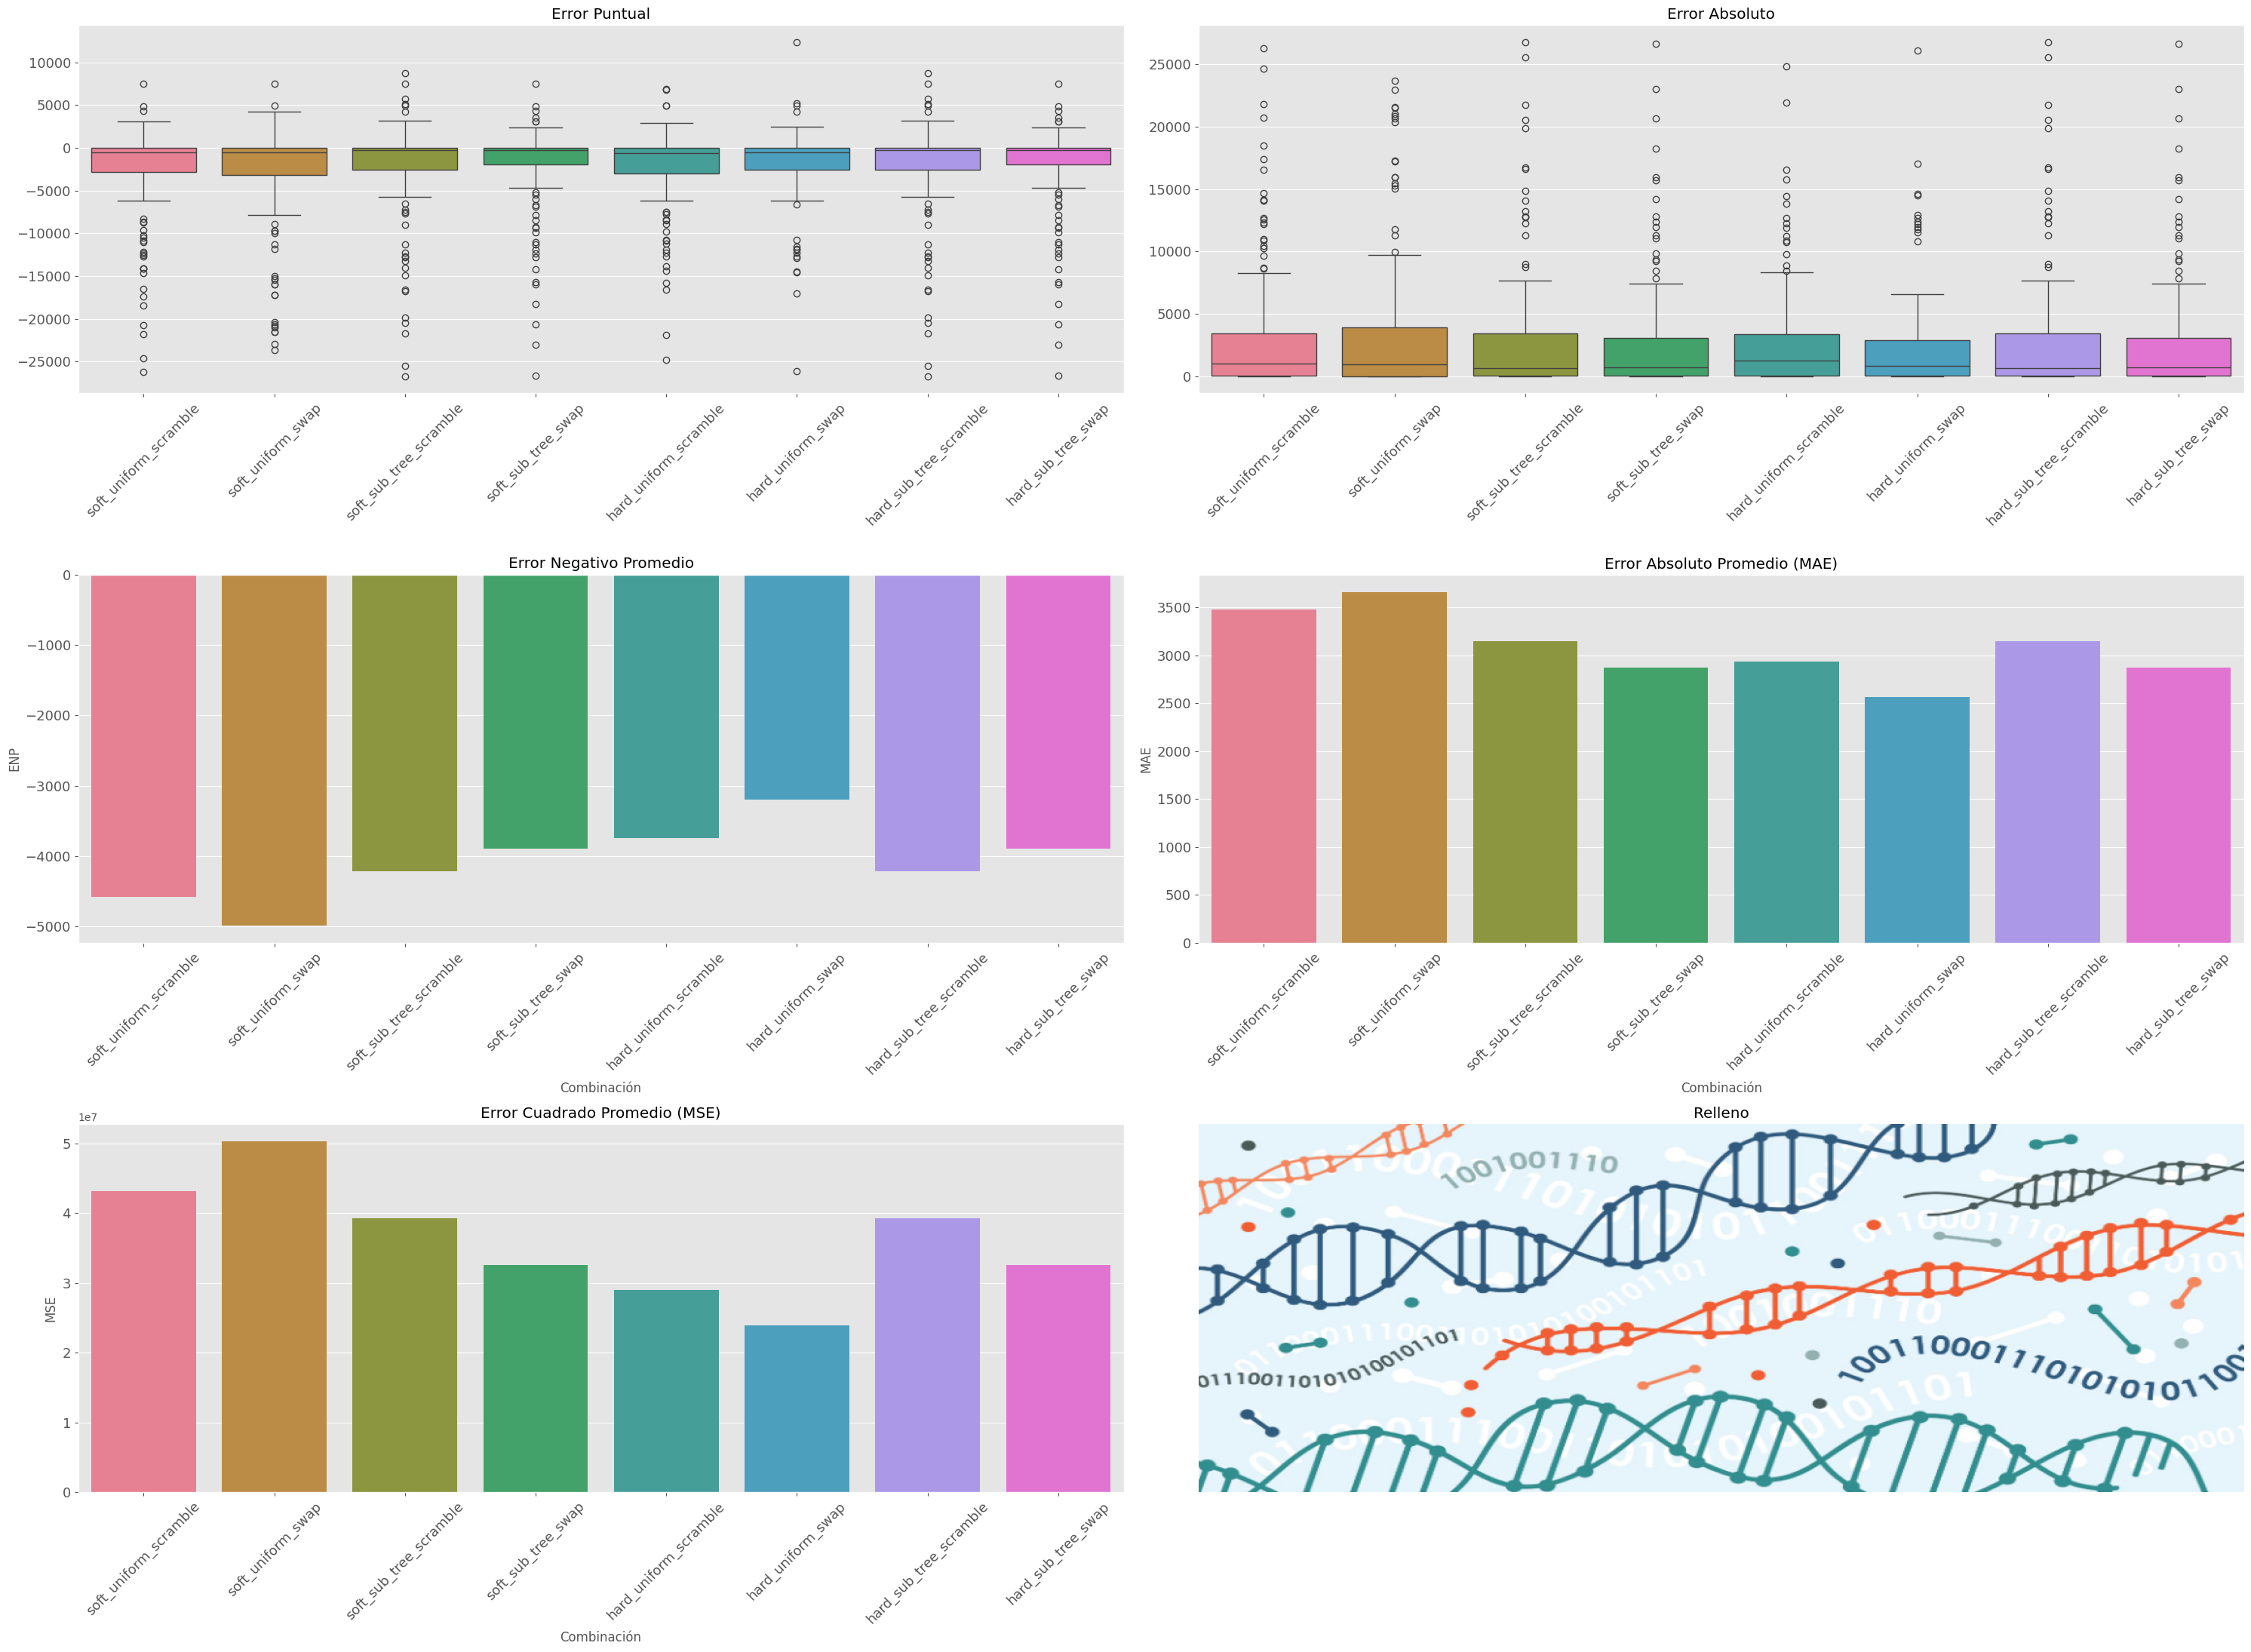

In [292]:
# Armar DataFrames

# Para E
e_df = pd.DataFrame({
    "soft_uniform_scramble": E_soft_uniform_scramble,
    "soft_uniform_swap":  E_soft_uniform_swap,
    "soft_sub_tree_scramble": E_soft_sub_tree_scramble,
    "soft_sub_tree_swap": E_soft_sub_tree_swap,
    "hard_uniform_scramble": E_hard_uniform_scramble,
    "hard_uniform_swap": E_hard_uniform_swap,
    "hard_sub_tree_scramble": E_hard_sub_tree_scramble,
    "hard_sub_tree_swap": E_hard_sub_tree_swap,
})


ae_df = pd.DataFrame({
    "soft_uniform_scramble": AE_soft_uniform_scramble,
    "soft_uniform_swap":      AE_soft_uniform_swap,
    "soft_sub_tree_scramble": AE_soft_sub_tree_scramble,
    "soft_sub_tree_swap":     AE_soft_sub_tree_swap,
    "hard_uniform_scramble":  AE_hard_uniform_scramble,
    "hard_uniform_swap":      AE_hard_uniform_swap,
    "hard_sub_tree_scramble": AE_hard_sub_tree_scramble,
    "hard_sub_tree_swap":     AE_hard_sub_tree_swap,
})


# Para ENP
enp_df = pd.DataFrame.from_dict({
    "soft_uniform_scramble": ENP_soft_uniform_scramble,
    "soft_uniform_swap": ENP_soft_uniform_swap,
    "soft_sub_tree_scramble": ENP_soft_sub_tree_scramble,
    "soft_sub_tree_swap": ENP_soft_sub_tree_swap,
    "hard_uniform_scramble": ENP_hard_uniform_scramble,
    "hard_uniform_swap": ENP_hard_uniform_swap,
    "hard_sub_tree_scramble": ENP_hard_sub_tree_scramble,
    "hard_sub_tree_swap": ENP_hard_sub_tree_swap,
}, orient="index", columns=["ENP"])

# Para MAE
mae_df = pd.DataFrame.from_dict({
    "soft_uniform_scramble": MAE_soft_uniform_scramble,
    "soft_uniform_swap": MAE_soft_uniform_swap,
    "soft_sub_tree_scramble": MAE_soft_sub_tree_scramble,
    "soft_sub_tree_swap": MAE_soft_sub_tree_swap,
    "hard_uniform_scramble": MAE_hard_uniform_scramble,
    "hard_uniform_swap": MAE_hard_uniform_swap,
    "hard_sub_tree_scramble": MAE_hard_sub_tree_scramble,
    "hard_sub_tree_swap": MAE_hard_sub_tree_swap,
}, orient="index", columns=["MAE"])

# Para MSE
mse_df = pd.DataFrame.from_dict({
    "soft_uniform_scramble": MSE_soft_uniform_scramble,
    "soft_uniform_swap": MSE_soft_uniform_swap,
    "soft_sub_tree_scramble": MSE_soft_sub_tree_scramble,
    "soft_sub_tree_swap": MSE_soft_sub_tree_swap,
    "hard_uniform_scramble": MSE_hard_uniform_scramble,
    "hard_uniform_swap": MSE_hard_uniform_swap,
    "hard_sub_tree_scramble": MSE_hard_sub_tree_scramble,
    "hard_sub_tree_swap": MSE_hard_sub_tree_swap,
}, orient="index", columns=["MSE"])

fig, axes = plt.subplots(3, 2, figsize=(30, 22))

# 1. Error puntual
sns.boxplot(data=e_df, ax=axes[0, 0])
axes[0, 0].set_title("Error Puntual")
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Error Absoluto (corregido)
sns.boxplot(data=ae_df, ax=axes[0, 1])
axes[0, 1].set_title("Error Absoluto")
axes[0, 1].tick_params(axis='x', rotation=45)


# 3. ENP
enp_df_reset = enp_df.reset_index().rename(columns={"index": "Combinación"})
sns.barplot(data=enp_df_reset, x="Combinación", y="ENP", ax=axes[1, 0], hue="Combinación")
axes[1, 0].set_title("Error Negativo Promedio")
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. MAE
mae_df_reset = mae_df.reset_index().rename(columns={"index": "Combinación"})
sns.barplot(data=mae_df_reset, x="Combinación", y="MAE", ax=axes[1, 1], hue="Combinación")
axes[1, 1].set_title("Error Absoluto Promedio (MAE)")
axes[1, 1].tick_params(axis='x', rotation=45)

# 5. MSE
mse_df_reset = mse_df.reset_index().rename(columns={"index": "Combinación"})
sns.barplot(data=mse_df_reset, x="Combinación", y="MSE", ax=axes[2, 0], hue="Combinación")
axes[2, 0].set_title("Error Cuadrado Promedio (MSE)")
axes[2, 0].tick_params(axis='x', rotation=45)

# 6. Relleno (imagen)
img = plt.imread("/content/drive/MyDrive/Proyecto - Compra Genética/Validación/Genetic-Algorithm-img.jpg")
axes[2, 1].imshow(img)
axes[2, 1].axis("off")
axes[2, 1].set_title("Relleno")
axes[2, 1].set_aspect('auto')
axes[2, 1].set_title("Relleno")

for ax in axes.flatten():
    ax.tick_params(axis='both', labelsize=13)

plt.tight_layout()
plt.show()

#### Comparación entre los nuestros

Después de comparar todas las métricas de error, queda claro que **hard_uniform_swap** es la mejor configuración para nuestro objetivo de minimizar el precio:

- **ENP (≈ –3 160)**: subestima menos el precio real que cualquier otra combinación.  
- **MAE (≈ 2 563)**: tiene la menor desviación absoluta promedio, es decir, sus predicciones están más cerca del valor real.  
- **MSE (≈ 2.36×10^7)**: registra el menor valor, lo que indica que evita errores grandes mejor que el resto.  
- **Boxplots de error puntual y absoluto**: muestran que su mediana está casi en cero y presenta la menor dispersión.

En resumen, **hard_uniform_swap** ofrece precios bajos y consistentes, cumpliendo perfectamente con el criterio de “menos es mejor”.


In [293]:
hard_uniform_swap_df.head()

,cluster_name,fuel_price,query,ga_cluster_solution,cluster_best_value,our_ga_best_solution,our_ga_best_value,pop_size,penalty_factor,cluster_time,memory used (mb),iters,mutation_method,mutation_prob,selection_method,selection_prob
0,small-3s-4p-f1_10-q1_4-random,1,['Purificadores de aire'],{'Supermercado Nacional': {'Alfombras': 1274.9...,11282.96,"[['Supermercado Nacional', 'Purificadores de a...",4401.99,10,9.0,1.130132,0.0,100,swap,0.1,hard,0.66
1,small-3s-4p-f1_10-q1_4-random,1,"['Purificadores de aire', 'Aceite de girasol',...",{'Supermercado Nacional': {'Alfombras': 1274.9...,11282.96,"[['Supermercado Nacional', 'Alfombras'], ['Sup...",11282.96,10,9.0,1.021947,0.0,100,swap,0.1,hard,0.66
2,small-3s-4p-f1_10-q1_4-random,6,['Purificadores de aire'],{'Supermercado Nacional': {'Purificadores de a...,11472.96,"[['Supermercado Nacional', 'Purificadores de a...",4501.99,10,9.0,0.946139,0.0,100,swap,0.1,hard,0.66
3,small-3s-4p-f1_10-q1_4-random,6,"['Purificadores de aire', 'Pasta de dientes', ...","{'Jumbo': {'Pasta de dientes': 2897.99, 'Aceit...",11400.96,"[['Jumbo', 'Pasta de dientes'], ['Jumbo', 'Ace...",11472.96,10,9.0,0.912263,0.0,100,swap,0.1,hard,0.66
4,small-5s-10p-f0_10-q1_10-random,0,['Televisores'],"{'Super Pola': {'Aftershave': 1074.99, 'Esmalt...",11702.90,"[['Super Pola', 'Televisores']]",619.99,10,9.0,0.998179,0.0,100,swap,0.1,hard,0.66


In [294]:
buen_orden_columnas_def_df = [
    "cluster_name",
    "fuel_price",
    "query",
    "mutation_method",
    "mutation_prob",
    "selection_method",
    "selection_prob",
    "pop_size",
    "penalty_factor",
    "our_ga_best_solution",
    "our_ga_best_value",
    "cluster_best_value",
    "ga_cluster_solution",
    "iters",
    "cluster_time",
    "memory used (mb)"
]

In [295]:
 hard_uniform_swap_df_ordenado = hard_uniform_swap_df[buen_orden_columnas_def_df].copy()

In [296]:
hard_uniform_swap_df_ordenado['profe_ga_best_value']      = profe_ga_best_value
hard_uniform_swap_df_ordenado['profe_ga_best_solution']   = profe_ga_best_solution
hard_uniform_swap_df_ordenado['profe_qbf_best_value']     = profe_qbf_best_value
hard_uniform_swap_df_ordenado['profe_qbf_best_solution']  = profe_qbf_best_solution
hard_uniform_swap_df_ordenado['profe_gc_best_value']      = profe_gc_best_value
hard_uniform_swap_df_ordenado['profe_gc_best_solution']   = profe_gc_best_solution
hard_uniform_swap_df_ordenado['profe_gn_best_value']      = profe_gn_best_value
hard_uniform_swap_df_ordenado['profe_gn_best_solution']   = profe_gn_best_solution

hard_uniform_swap_df_ordenado['Error_Og_ga_Vs_our_ga']           = profe_ga_best_value - hard_uniform_swap_df_ordenado['our_ga_best_value']
hard_uniform_swap_df_ordenado['Error_Absoluto_Og_ga_Vs_our_ga']  = abs(hard_uniform_swap_df_ordenado['Error_Og_ga_Vs_our_ga'])

hard_uniform_swap_df_ordenado['Error_Og_qbf_Vs_our_ga']          = profe_qbf_best_value - hard_uniform_swap_df_ordenado['our_ga_best_value']
hard_uniform_swap_df_ordenado['Error_Absoluto_Og_qbf_Vs_our_ga'] = abs(hard_uniform_swap_df_ordenado['Error_Og_qbf_Vs_our_ga'])

hard_uniform_swap_df_ordenado['Error_Og_gc_Vs_our_ga']           = profe_gc_best_value - hard_uniform_swap_df_ordenado['our_ga_best_value']
hard_uniform_swap_df_ordenado['Error_Absoluto_Og_gc_Vs_our_ga']  = abs(hard_uniform_swap_df_ordenado['Error_Og_gc_Vs_our_ga'])

hard_uniform_swap_df_ordenado['Error_Og_gn_Vs_our_ga']           = profe_gn_best_value - hard_uniform_swap_df_ordenado['our_ga_best_value']
hard_uniform_swap_df_ordenado['Error_Absoluto_Og_gn_Vs_our_ga']  = abs(hard_uniform_swap_df_ordenado['Error_Og_gn_Vs_our_ga'])


In [297]:
hard_uniform_swap_df_ordenado = hard_uniform_swap_df_ordenado[
    [
        'cluster_name', 'fuel_price', 'query', 'mutation_method',
        'mutation_prob', 'selection_method', 'selection_prob', 'pop_size',
        'penalty_factor', 'our_ga_best_solution', 'our_ga_best_value',
        'cluster_best_value', 'ga_cluster_solution', 'iters', 'cluster_time',
        'memory used (mb)', 'profe_ga_best_value', 'profe_ga_best_solution',
        'profe_qbf_best_value', 'profe_qbf_best_solution',
        'profe_gc_best_value', 'profe_gc_best_solution',
        'profe_gn_best_value', 'profe_gn_best_solution',
        'Error_Og_ga_Vs_our_ga', 'Error_Absoluto_Og_ga_Vs_our_ga',
        'Error_Og_qbf_Vs_our_ga', 'Error_Absoluto_Og_qbf_Vs_our_ga',
        'Error_Og_gc_Vs_our_ga', 'Error_Absoluto_Og_gc_Vs_our_ga',
        'Error_Og_gn_Vs_our_ga', 'Error_Absoluto_Og_gn_Vs_our_ga'
    ]
]

In [298]:
hard_uniform_swap_df_ordenado

,cluster_name,fuel_price,query,mutation_method,mutation_prob,selection_method,selection_prob,pop_size,penalty_factor,our_ga_best_solution,...,profe_gn_best_value,profe_gn_best_solution,Error_Og_ga_Vs_our_ga,Error_Absoluto_Og_ga_Vs_our_ga,Error_Og_qbf_Vs_our_ga,Error_Absoluto_Og_qbf_Vs_our_ga,Error_Og_gc_Vs_our_ga,Error_Absoluto_Og_gc_Vs_our_ga,Error_Og_gn_Vs_our_ga,Error_Absoluto_Og_gn_Vs_our_ga
0,small-3s-4p-f1_10-q1_4-random,1,['Purificadores de aire'],swap,0.1,hard,0.66,10,9.0,"[['Supermercado Nacional', 'Purificadores de a...",...,4401.99,"[array(['Supermercado Nacional', 'Purificadore...",0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00
1,small-3s-4p-f1_10-q1_4-random,1,"['Purificadores de aire', 'Aceite de girasol',...",swap,0.1,hard,0.66,10,9.0,"[['Supermercado Nacional', 'Alfombras'], ['Sup...",...,12817.96,"[array(['Supermercado Nacional', 'Alfombras'],...",1.00,1.00,-12.0,12.0,-12.00,12.00,1535.00,1535.00
2,small-3s-4p-f1_10-q1_4-random,6,['Purificadores de aire'],swap,0.1,hard,0.66,10,9.0,"[['Supermercado Nacional', 'Purificadores de a...",...,4501.99,"[array(['Supermercado Nacional', 'Purificadore...",0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00
3,small-3s-4p-f1_10-q1_4-random,6,"['Purificadores de aire', 'Pasta de dientes', ...",swap,0.1,hard,0.66,10,9.0,"[['Jumbo', 'Pasta de dientes'], ['Jumbo', 'Ace...",...,12917.96,"[array(['Supermercado Nacional', 'Alfombras'],...",6.00,6.00,-72.0,72.0,-72.00,72.00,1445.00,1445.00
4,small-5s-10p-f0_10-q1_10-random,0,['Televisores'],swap,0.1,hard,0.66,10,9.0,"[['Super Pola', 'Televisores']]",...,3638.99,"[array(['Bravo', 'Televisores'], dtype=object)]",0.00,0.00,0.0,0.0,0.00,0.00,3019.00,3019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,big-100s-300p-f0_10-q1_20-random,5,"['Gasas', 'Alcohol', 'Té negro', 'Tijeras', 'T...",swap,0.2,hard,0.40,80,27.0,"[['Supermercado El Bienvenido', 'Pimienta negr...",...,50339.84,"[array(['Supermercado La Perla', 'Pimienta neg...",-12922.99,12922.99,NaN,NaN,-26331.99,26331.99,21711.01,21711.01
132,big-100s-300p-f0_10-q1_20-random,9,['Detergente para ropa'],swap,0.2,hard,0.40,80,27.0,"[['Supermercado El Bienvenido', 'Detergente pa...",...,648.99,"[array(['Supermercado Plaza Oriental', 'Deterg...",-1685.00,1685.00,NaN,NaN,-1685.00,1685.00,-1143.00,1143.00
133,big-100s-300p-f0_10-q1_20-random,9,"['Mermelada de durazno', 'Pañales', 'Leche ent...",swap,0.2,hard,0.40,80,27.0,"[['Supermercado El Bienvenido', 'Filete de res...",...,12257.94,"[array(['Supermercado La Perla', 'Mermelada de...",-5438.00,5438.00,NaN,NaN,-6513.00,6513.00,4744.00,4744.00
134,big-100s-300p-f0_10-q1_20-random,9,"['Galletas de chocolate', 'Pechugas de pollo',...",swap,0.2,hard,0.40,80,27.0,"[['Supermercado Market Center', 'Coliflor'], [...",...,24586.89,"[array(['Supermercado La Perla', 'Cargadores d...",-14586.00,14586.00,NaN,NaN,-21741.00,21741.00,1297.00,1297.00


In [299]:
hard_uniform_swap_df_final = hard_uniform_swap_df_ordenado.copy()

In [300]:
base_dir = "/content/drive/MyDrive/Proyecto - Compra Genética/Validación"
target_dir = os.path.join(base_dir, "Lo Mejor")
filename = "hard_uniform_swap_df.csv"

if os.getcwd() != base_dir:
    os.chdir(base_dir)

os.makedirs(target_dir, exist_ok=True)
hard_uniform_swap_df_final.to_csv(os.path.join(target_dir, filename), index=False)

In [301]:
hard_uniform_swap_df_final

,cluster_name,fuel_price,query,mutation_method,mutation_prob,selection_method,selection_prob,pop_size,penalty_factor,our_ga_best_solution,...,profe_gn_best_value,profe_gn_best_solution,Error_Og_ga_Vs_our_ga,Error_Absoluto_Og_ga_Vs_our_ga,Error_Og_qbf_Vs_our_ga,Error_Absoluto_Og_qbf_Vs_our_ga,Error_Og_gc_Vs_our_ga,Error_Absoluto_Og_gc_Vs_our_ga,Error_Og_gn_Vs_our_ga,Error_Absoluto_Og_gn_Vs_our_ga
0,small-3s-4p-f1_10-q1_4-random,1,['Purificadores de aire'],swap,0.1,hard,0.66,10,9.0,"[['Supermercado Nacional', 'Purificadores de a...",...,4401.99,"[array(['Supermercado Nacional', 'Purificadore...",0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00
1,small-3s-4p-f1_10-q1_4-random,1,"['Purificadores de aire', 'Aceite de girasol',...",swap,0.1,hard,0.66,10,9.0,"[['Supermercado Nacional', 'Alfombras'], ['Sup...",...,12817.96,"[array(['Supermercado Nacional', 'Alfombras'],...",1.00,1.00,-12.0,12.0,-12.00,12.00,1535.00,1535.00
2,small-3s-4p-f1_10-q1_4-random,6,['Purificadores de aire'],swap,0.1,hard,0.66,10,9.0,"[['Supermercado Nacional', 'Purificadores de a...",...,4501.99,"[array(['Supermercado Nacional', 'Purificadore...",0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00
3,small-3s-4p-f1_10-q1_4-random,6,"['Purificadores de aire', 'Pasta de dientes', ...",swap,0.1,hard,0.66,10,9.0,"[['Jumbo', 'Pasta de dientes'], ['Jumbo', 'Ace...",...,12917.96,"[array(['Supermercado Nacional', 'Alfombras'],...",6.00,6.00,-72.0,72.0,-72.00,72.00,1445.00,1445.00
4,small-5s-10p-f0_10-q1_10-random,0,['Televisores'],swap,0.1,hard,0.66,10,9.0,"[['Super Pola', 'Televisores']]",...,3638.99,"[array(['Bravo', 'Televisores'], dtype=object)]",0.00,0.00,0.0,0.0,0.00,0.00,3019.00,3019.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,big-100s-300p-f0_10-q1_20-random,5,"['Gasas', 'Alcohol', 'Té negro', 'Tijeras', 'T...",swap,0.2,hard,0.40,80,27.0,"[['Supermercado El Bienvenido', 'Pimienta negr...",...,50339.84,"[array(['Supermercado La Perla', 'Pimienta neg...",-12922.99,12922.99,NaN,NaN,-26331.99,26331.99,21711.01,21711.01
132,big-100s-300p-f0_10-q1_20-random,9,['Detergente para ropa'],swap,0.2,hard,0.40,80,27.0,"[['Supermercado El Bienvenido', 'Detergente pa...",...,648.99,"[array(['Supermercado Plaza Oriental', 'Deterg...",-1685.00,1685.00,NaN,NaN,-1685.00,1685.00,-1143.00,1143.00
133,big-100s-300p-f0_10-q1_20-random,9,"['Mermelada de durazno', 'Pañales', 'Leche ent...",swap,0.2,hard,0.40,80,27.0,"[['Supermercado El Bienvenido', 'Filete de res...",...,12257.94,"[array(['Supermercado La Perla', 'Mermelada de...",-5438.00,5438.00,NaN,NaN,-6513.00,6513.00,4744.00,4744.00
134,big-100s-300p-f0_10-q1_20-random,9,"['Galletas de chocolate', 'Pechugas de pollo',...",swap,0.2,hard,0.40,80,27.0,"[['Supermercado Market Center', 'Coliflor'], [...",...,24586.89,"[array(['Supermercado La Perla', 'Cargadores d...",-14586.00,14586.00,NaN,NaN,-21741.00,21741.00,1297.00,1297.00


## FIN

### Contribuyentes

#### Darwin Mendez:
* GitHub:  https://github.com/Daarwinmendez
* LinkedIn: www.linkedin.com/in/darwin-mendez-061881185

#### Camily García
* GitHub: https://github.com/CamyG18
* LinkedIn: https://www.linkedin.com/in/camily-garcía-7b4632319/


#### Michael García
* GitHub: https://github.com/MichaGF0305
* LinkedIn: https://www.linkedin.com/in/michael-david-garc%C3%ADa-feliz-37446b296/


#### Roither Sanchez
* GitHub: https://github.com/XTrollaX
* LinkedIn: https://www.linkedin.com/in/roither-sànchez-sosa-b77b37244/


